In [1]:
#importing libraries we will need for EDA and FE
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')
pd.set_option('display.max_columns', 50)

In [2]:
airline_df = pd.read_excel('Data_Train (1).xlsx')
airline_df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,Null,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,Null,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,Null,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,Null,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,Null,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,Null,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,Null,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,Null,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,Null,12648


# Exploratory Data Analysis (EDA)
## Feature Explanation
- **'Airline'** feature tells us the airline company name. It is pretty self-explanatory.
- **'Date_of_Journey'** feature tells us the date of the flight. It is in the form of dd/mm/yyyy.
- **'Source'** tells us the location where the flight was boarded by passengers.
- **'Destination'** gives us the location of the flight's final destination and landing.
- **'Route'** is the description of the flight's route using shorthand notations used for different locations by Airlines. It includes the layover locations as well. It is the complete order of journey starting from Source and ending with Destination.
- **'Dep_Time'** is the time of departure of the flight from the 'Source' location. It is in 24-hour format.
- **'Arrival_Time'** is the time of arrival of the flight to the 'Destination' location. It is also in 24 hour format. Some of the entries in this feature also includes the date and month.
- **'Duration'** is the flight duration from Departure time to Arrival time in hour and minute format. 
- **'Total_Stops'** is the number of stops, ie landings or layovers between Source and Destination.
- **'Additional_Info'** is any additional information about the flight such as layovers, meal etc.
- **'Price'** is the cost of the flight ticket.

In [3]:
airline_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [4]:
airline_df.isnull().sum()
#there are only one null value in Route and Total_Stops column each

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [5]:
airline_df.describe(include = 'all')

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
count,10683,10683,10683,10683,10682,10683,10683,10683,10682,10683,10683.000000
unique,12,44,5,6,128,222,1343,368,5,10,NaN
top,Jet Airways,18/05/2019,Delhi,Cochin,DEL → BOM → COK,18:55,19:00,2h 50m,1 stop,Null,NaN
freq,3849,504,4537,4537,2376,233,423,550,5625,8347,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9087.064121
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4611.359167
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1759.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5277.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8372.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12373.000000


In [6]:
airline_df.duplicated().sum()

220

In [7]:
airline_df.nunique()

Airline              12
Date_of_Journey      44
Source                5
Destination           6
Route               128
Dep_Time            222
Arrival_Time       1343
Duration            368
Total_Stops           5
Additional_Info      10
Price              1870
dtype: int64

In [8]:
#printing the unique vlues for each column
for col in airline_df.columns:
    print('The unique values in {} feature of the dataset are:'.format(col))
    print('\n', airline_df[col].unique())
    print('-------------------------------------------------------------')

The unique values in Airline feature of the dataset are:

 ['IndiGo' 'Air India' 'Jet Airways' 'SpiceJet' 'Multiple carriers' 'GoAir'
 'Vistara' 'Air Asia' 'Vistara Premium economy' 'Jet Airways Business'
 'Multiple carriers Premium economy' 'Trujet']
-------------------------------------------------------------
The unique values in Date_of_Journey feature of the dataset are:

 ['24/03/2019' '1/05/2019' '9/06/2019' '12/05/2019' '01/03/2019'
 '24/06/2019' '12/03/2019' '27/05/2019' '1/06/2019' '18/04/2019'
 '9/05/2019' '24/04/2019' '3/03/2019' '15/04/2019' '12/06/2019'
 '6/03/2019' '21/03/2019' '3/04/2019' '6/05/2019' '15/05/2019'
 '18/06/2019' '15/06/2019' '6/04/2019' '18/05/2019' '27/06/2019'
 '21/05/2019' '06/03/2019' '3/06/2019' '15/03/2019' '3/05/2019'
 '9/03/2019' '6/06/2019' '24/05/2019' '09/03/2019' '1/04/2019'
 '21/04/2019' '21/06/2019' '27/03/2019' '18/03/2019' '12/04/2019'
 '9/04/2019' '1/03/2019' '03/03/2019' '27/04/2019']
-----------------------------------------------------

In [9]:
#instead of NaN we can also have other data which is basically null values. 
#recognizing them and cleaning them up is also necessary.
airline_df[(airline_df['Additional_Info'] == 'Null') | (airline_df['Additional_Info'] == 'Null ')]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,Null,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,Null,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,Null,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,Null,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,Null,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,Null,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,Null,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,Null,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,Null,12648


In [10]:
no_of_null = len(airline_df[(airline_df['Additional_Info'] == 'Null') | (airline_df['Additional_Info'] == 'Null ')])
percentage_null_values = no_of_null / len(airline_df['Additional_Info']) * 100
percentage_null_values

78.14284377047646

### Insights:
- Almost 78% of data in the featre 'Additional_Info is missing, hence we will drop this column after EDA completion.

In [11]:
for col in airline_df.columns:
    print(f'The value counts for each value in {col} feature is/are: \n{airline_df[col].value_counts()}')
    print('------------------------------------------------------------------')

The value counts for each value in Airline feature is/are: 
Airline
Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: count, dtype: int64
------------------------------------------------------------------
The value counts for each value in Date_of_Journey feature is/are: 
Date_of_Journey
18/05/2019    504
6/06/2019     503
21/05/2019    497
9/06/2019     495
12/06/2019    493
9/05/2019     484
21/03/2019    423
15/05/2019    405
27/05/2019    382
27/06/2019    355
24/06/2019    351
1/06/2019     342
3/06/2019     333
15/06/2019    328

## Feature Engineering

In [12]:
def preprocess(data):
    '''
    Function preprocesses the data and makes it model ready. Simply push 
    dataframe in the function. 
    Use only after treating null values or when null values are less enough to
    drop. It returns two dataframes, one for EDA and another for ML model.
    '''
    
    #there is only one null value in each of Route and Total_Stops features.
    data.dropna(inplace = True)
    #dropping the 220 duplicate data
    data.drop_duplicates(inplace = True)
    
    #processing Date_of_Journey to day, month, year and weekday
    data['Date_of_Journey'] = pd.to_datetime(data['Date_of_Journey'])
    data['day'] = pd.DatetimeIndex(data['Date_of_Journey']).day
    data['month'] = pd.DatetimeIndex(data['Date_of_Journey']).month
    data['year'] = pd.DatetimeIndex(data['Date_of_Journey']).year
    data['weekday'] = pd.DatetimeIndex(data['Date_of_Journey']).weekday
    
    #processing Total_Stops to numerical data type
    data['Total_Stops'] = data['Total_Stops'].str.replace('non-stop', '0')
    data['Total_Stops'] = data['Total_Stops'].str.replace('stops', '')
    data['Total_Stops'] = data['Total_Stops'].str.replace('stop', '')
    data['Total_Stops'] = data['Total_Stops'].astype(int)
    
    #processing duplicate names of features
    data['Destination'] = np.where(data['Destination'] == 'New Delhi', 'Delhi', data['Destination'])
    data['Airline'] = np.where(data['Airline'] == 'Jet Airways Business', 'Jet Airways', data['Airline'])
    
    #processing Dep_Time to hours and minutes
    data['Dep_Time_Hour'] = pd.DatetimeIndex(data['Dep_Time']).hour
    data['Dep_Time_Minute'] = pd.DatetimeIndex(data['Dep_Time']).minute
    
    #processing Arrival_Time by removing the date information
    Arrival_Time = []
    for i in data['Arrival_Time']:
        Arrival_Time.append(i[:5])
    data['Arrival_Time'] = Arrival_Time
    #processing Arrival_Time to hours and minutes
    data['Arrival_Time_Hour'] = pd.DatetimeIndex(data['Arrival_Time']).hour
    data['Arrival_Time_Minute'] = pd.DatetimeIndex(data['Arrival_Time']).minute
    
    #processing duration hours in numeric format
    data['Duration_Total_Hours'] = data['Duration'].str.replace('h', '*1').str.replace(' ', '+').str.replace('m', '/60').apply(eval)
    
    data1 = pd.get_dummies(data, prefix = ['Airline', 'Source', 'Destination'], columns = ['Airline', 'Source', 'Destination'], drop_first = False, dtype = int)
    data1.drop(['Date_of_Journey', 'Dep_Time', 'Arrival_Time', 'Additional_Info', 'year', 'Duration'], axis = 1, inplace = True)
    return data, data1

In [13]:
data, data_model = preprocess(airline_df)

In [14]:
#pd.get_dummies?

In [15]:
#EDA dataset
data

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,day,month,year,weekday,Dep_Time_Hour,Dep_Time_Minute,Arrival_Time_Hour,Arrival_Time_Minute,Duration_Total_Hours
0,IndiGo,2019-03-24,Banglore,Delhi,BLR → DEL,22:20,01:10,2h 50m,0,Null,3897,24,3,2019,6,22,20,1,10,2.833333
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2,Null,7662,1,5,2019,2,5,50,13,15,7.416667
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25,19h,2,Null,13882,9,6,2019,6,9,25,4,25,19.000000
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1,Null,6218,12,5,2019,6,18,5,23,30,5.416667
4,IndiGo,2019-03-01,Banglore,Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1,Null,13302,1,3,2019,4,16,50,21,35,4.750000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,2019-04-09,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,0,Null,4107,9,4,2019,1,19,55,22,25,2.500000
10679,Air India,2019-04-27,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,0,Null,4145,27,4,2019,5,20,45,23,20,2.583333
10680,Jet Airways,2019-04-27,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,0,Null,7229,27,4,2019,5,8,20,11,20,3.000000
10681,Vistara,2019-03-01,Banglore,Delhi,BLR → DEL,11:30,14:10,2h 40m,0,Null,12648,1,3,2019,4,11,30,14,10,2.666667


In [16]:
#mL dataset
data_model

,Route,Total_Stops,Price,day,month,weekday,Dep_Time_Hour,Dep_Time_Minute,Arrival_Time_Hour,Arrival_Time_Minute,Duration_Total_Hours,Airline_Air Asia,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Banglore,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata
0,BLR → DEL,0,3897,24,3,6,22,20,1,10,2.833333,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
1,CCU → IXR → BBI → BLR,2,7662,1,5,2,5,50,13,15,7.416667,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
2,DEL → LKO → BOM → COK,2,13882,9,6,6,9,25,4,25,19.000000,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
3,CCU → NAG → BLR,1,6218,12,5,6,18,5,23,30,5.416667,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
4,BLR → NAG → DEL,1,13302,1,3,4,16,50,21,35,4.750000,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,CCU → BLR,0,4107,9,4,1,19,55,22,25,2.500000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
10679,CCU → BLR,0,4145,27,4,5,20,45,23,20,2.583333,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
10680,BLR → DEL,0,7229,27,4,5,8,20,11,20,3.000000,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
10681,BLR → DEL,0,12648,1,3,4,11,30,14,10,2.666667,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0


# EDA
## Univariate Analysis
## 1. Numerical Features

[Text(0, 0, '2043'),
 Text(0, 0, '1694'),
 Text(0, 0, '3706'),
 Text(0, 0, '815'),
 Text(0, 0, '1196'),
 Text(0, 0, '194'),
 Text(0, 0, '478'),
 Text(0, 0, '319'),
 Text(0, 0, '3'),
 Text(0, 0, '13'),
 Text(0, 0, '1')]

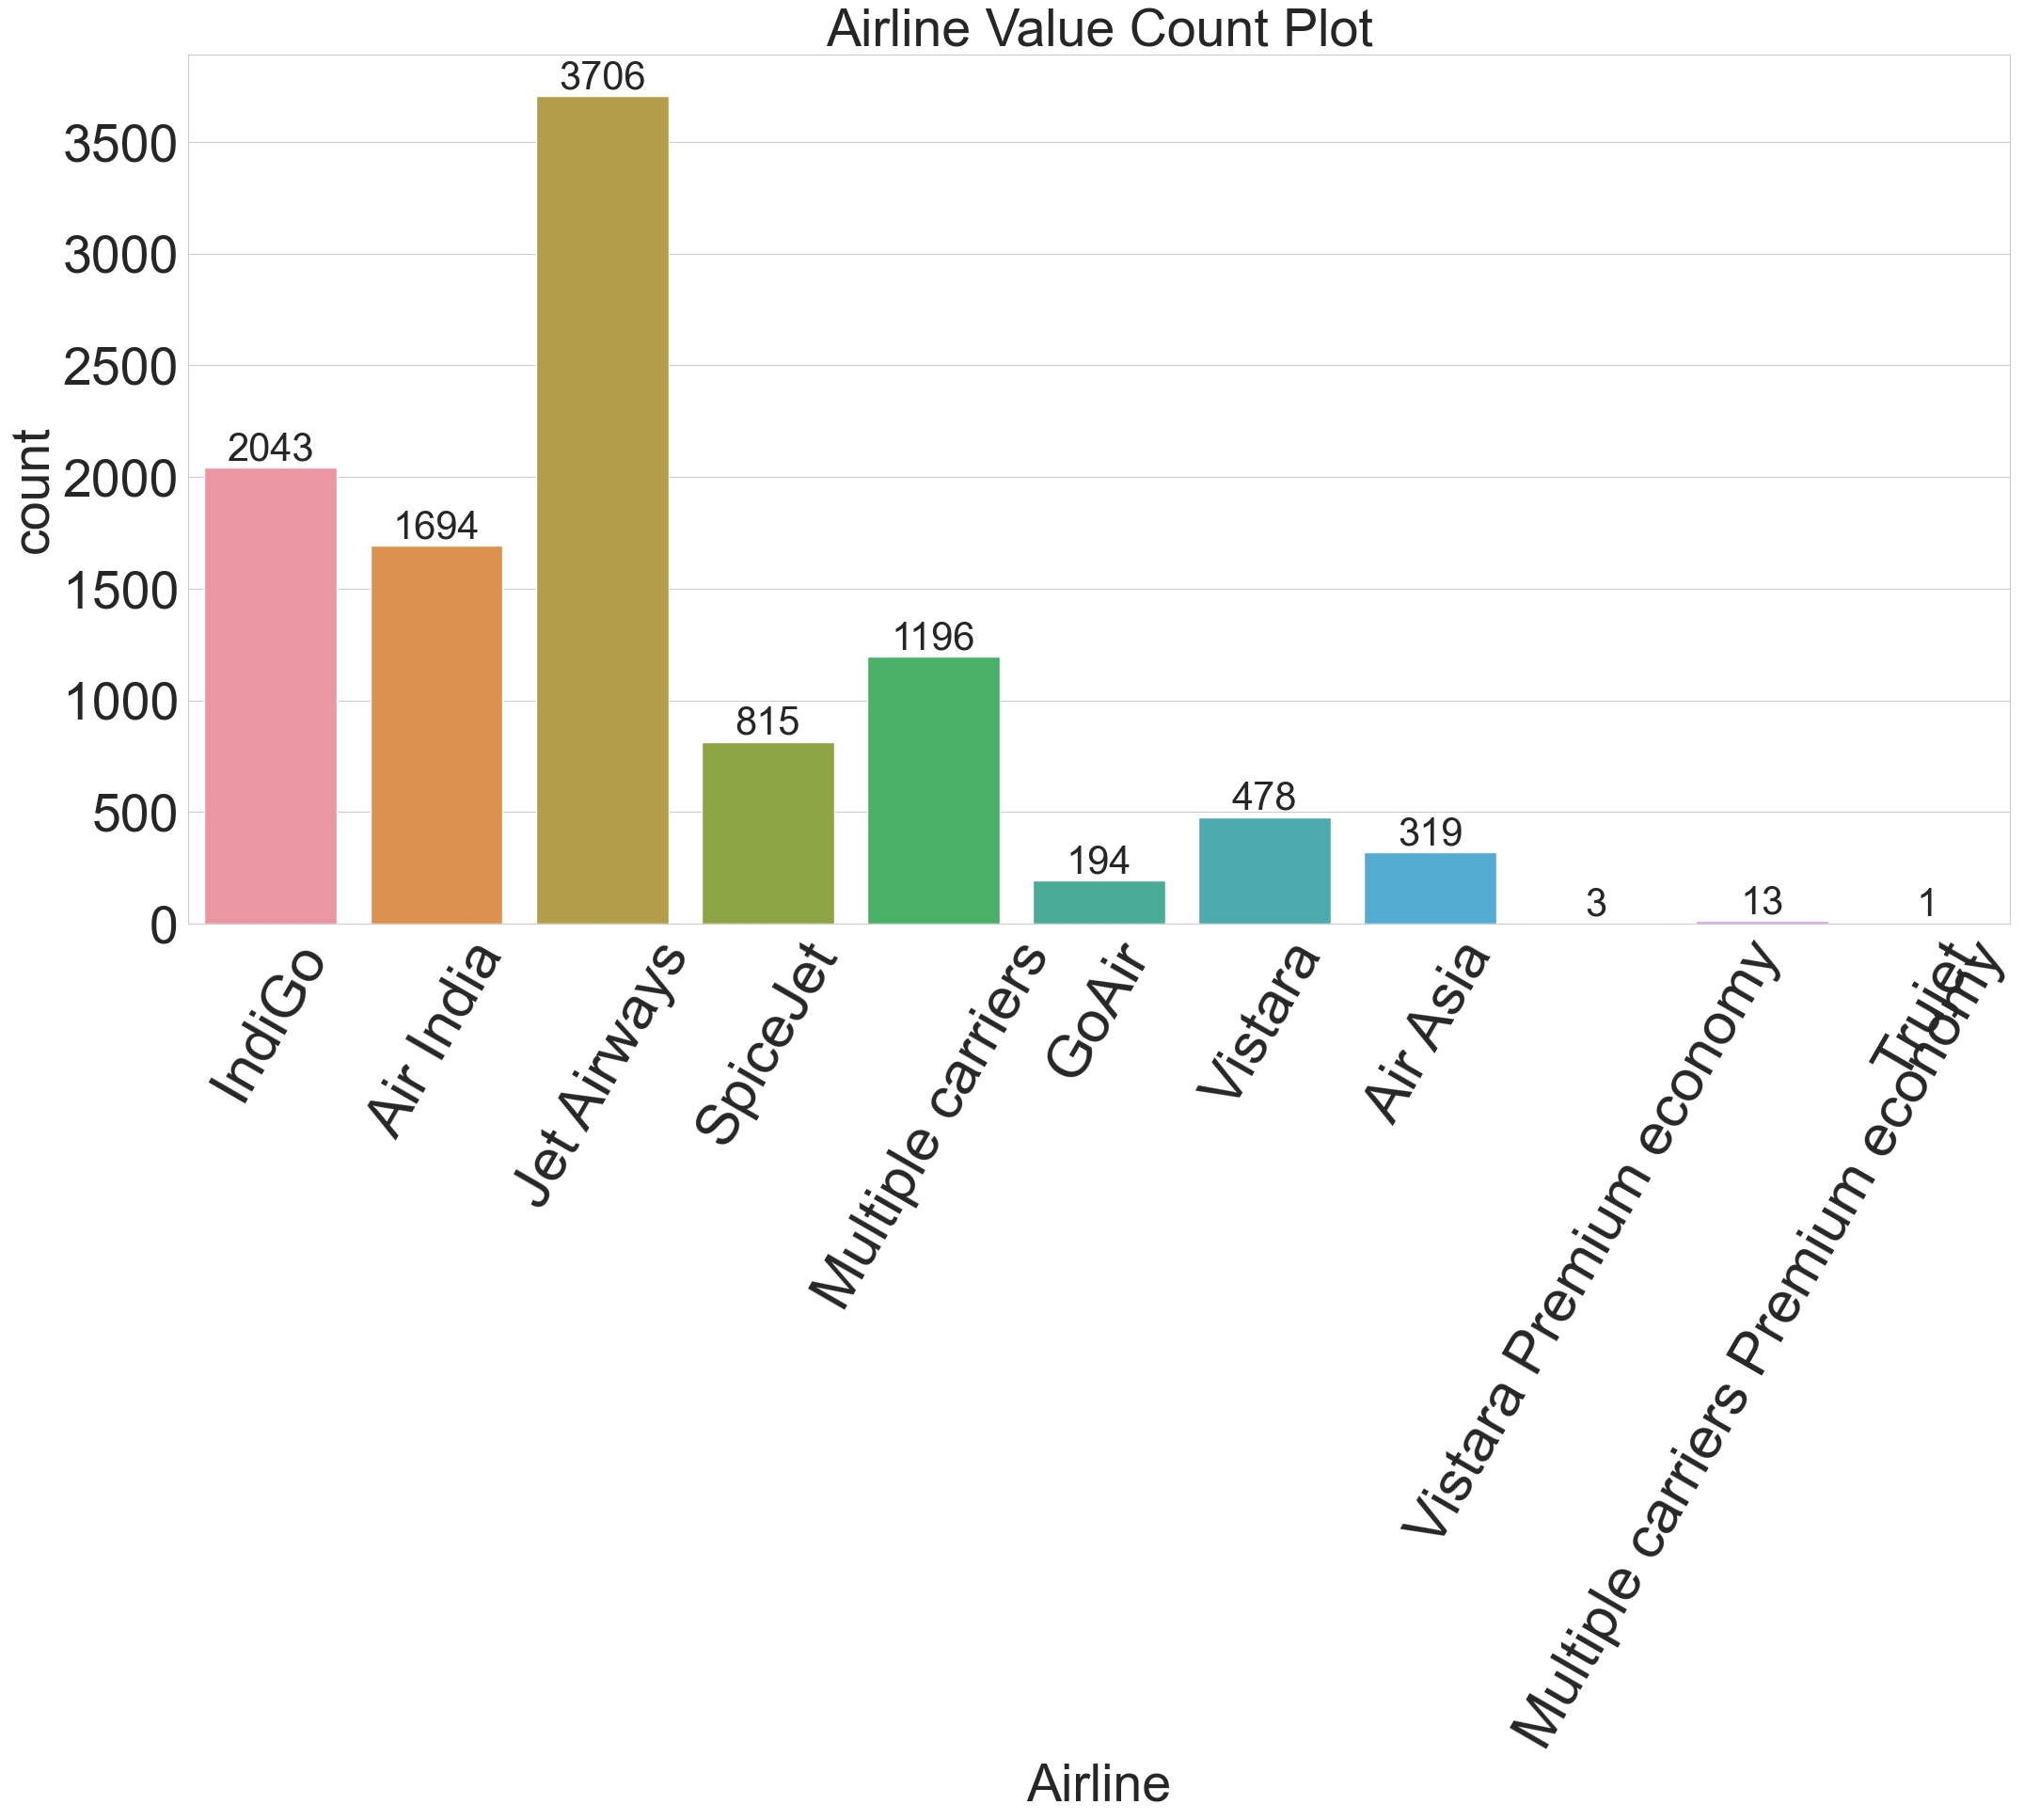

In [17]:
ax = plt.figure(figsize = (25,12))
plt.xlabel('Airline', fontsize = 40)
plt.ylabel('Count', fontsize = 40)
plt.xticks(rotation = 60, fontsize = 45)
plt.yticks(fontsize = 40)
plt.title('Airline Value Count Plot', fontsize = 40)
ax = sns.countplot(x = data['Airline'])
ax.bar_label(ax.containers[0], size= 30)

[Text(0, 0, '3475'),
 Text(0, 0, '5625'),
 Text(0, 0, '1318'),
 Text(0, 0, '43'),
 Text(0, 0, '1')]

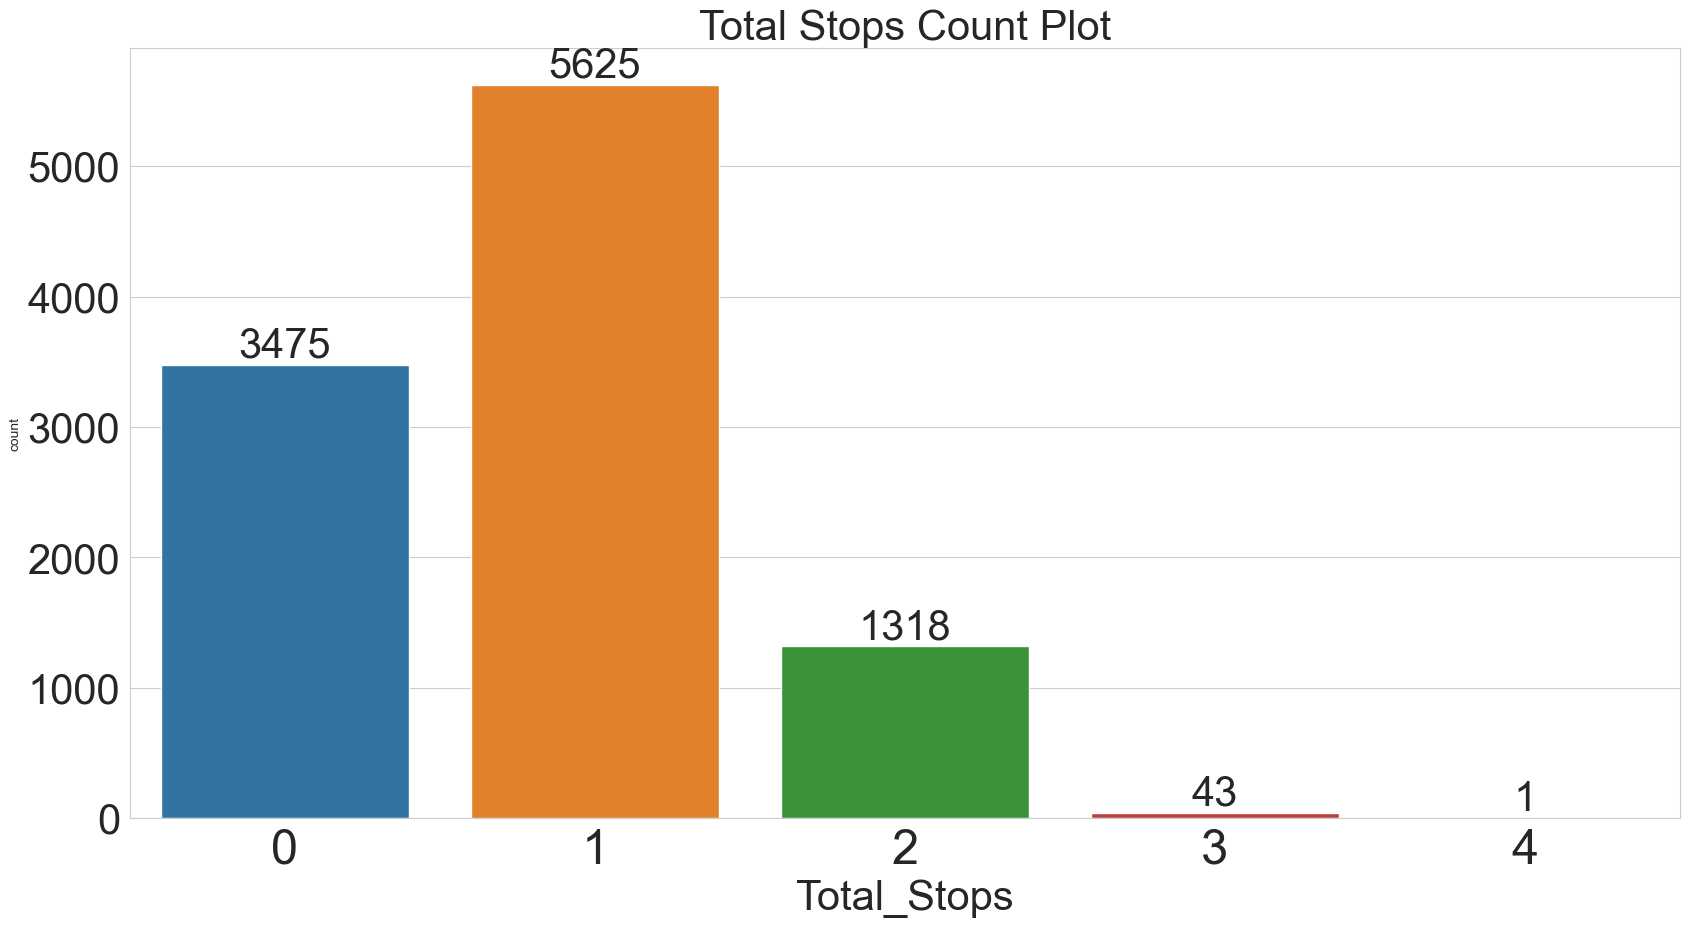

In [18]:
plt.figure(figsize = (20,10))
plt.xlabel('Total Stops', fontsize = 30)
plt.title('Total Stops Count Plot', fontsize = 30)
plt.xticks(fontsize = 35)
plt.yticks(fontsize = 30)
ax = sns.countplot(x = data['Total_Stops'])
ax.bar_label(ax.containers[0], size = 30)

[Text(0, 0, '2179'),
 Text(0, 0, '2860'),
 Text(0, 0, '4345'),
 Text(0, 0, '381'),
 Text(0, 0, '697')]

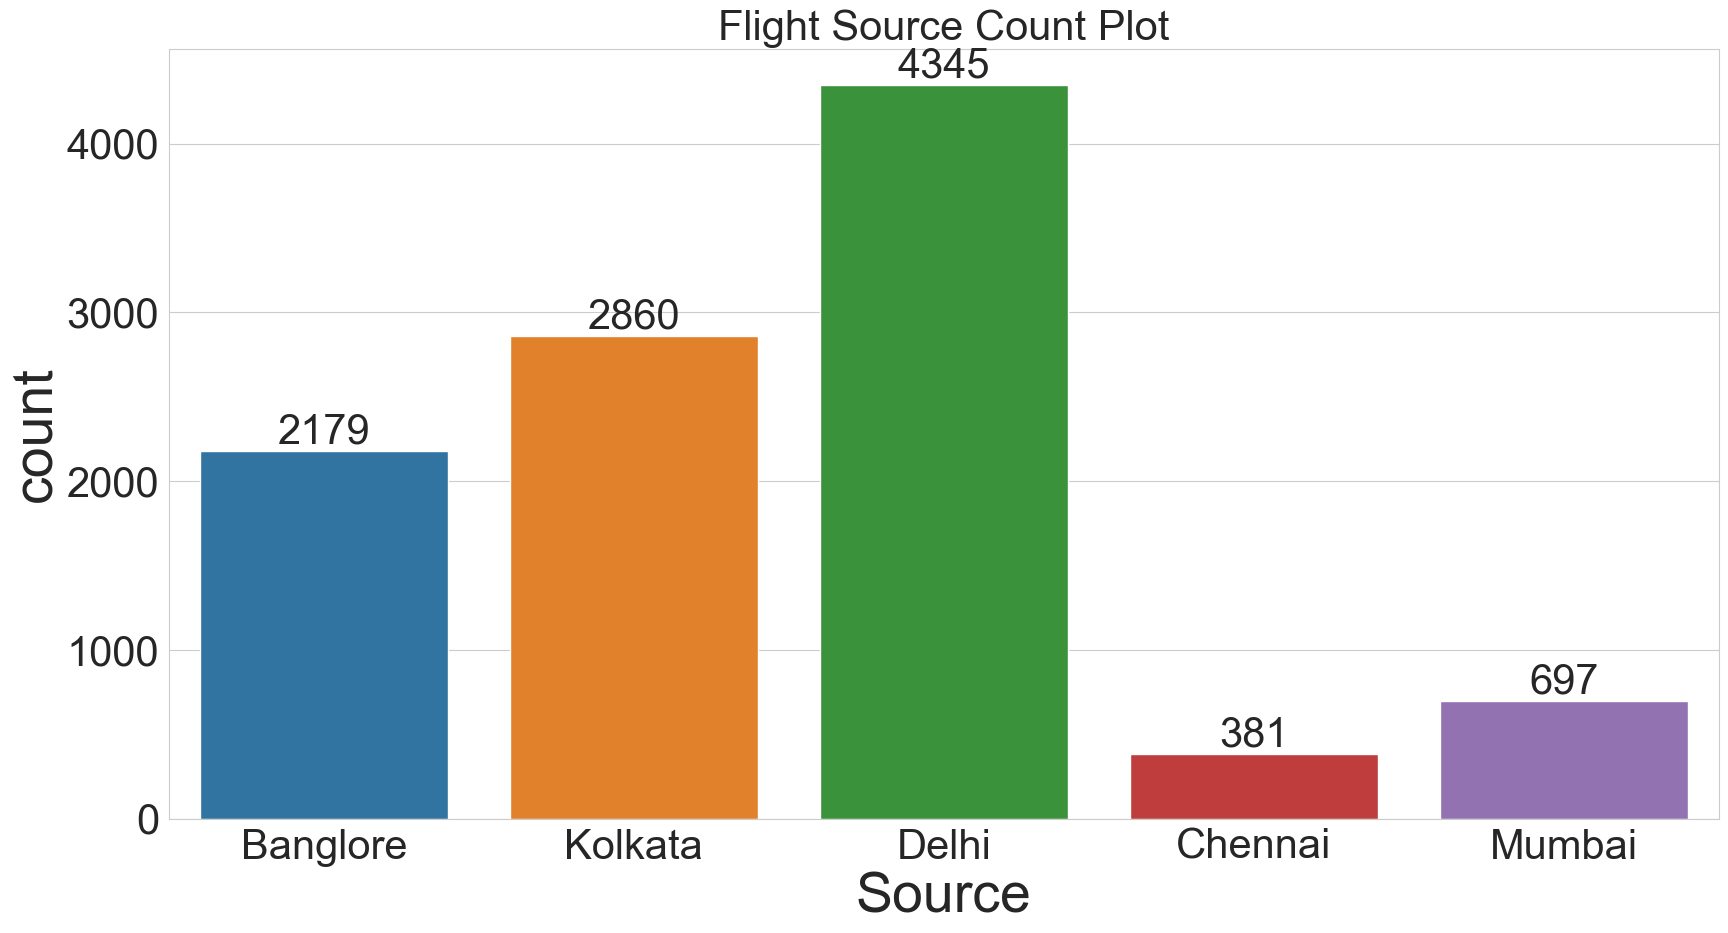

In [19]:
plt.figure(figsize = (20,10))
plt.xlabel('Source of Flight', fontsize = 40)
plt.ylabel('Count', fontsize = 40)
plt.title('Flight Source Count Plot', fontsize = 30)
plt.xticks(fontsize = 30)
plt.yticks(fontsize = 30)
ax = sns.countplot(x = data['Source'])
ax.bar_label(ax.containers[0], size = 30)

[Text(0, 0, '2179'),
 Text(0, 0, '2860'),
 Text(0, 0, '4345'),
 Text(0, 0, '381'),
 Text(0, 0, '697')]

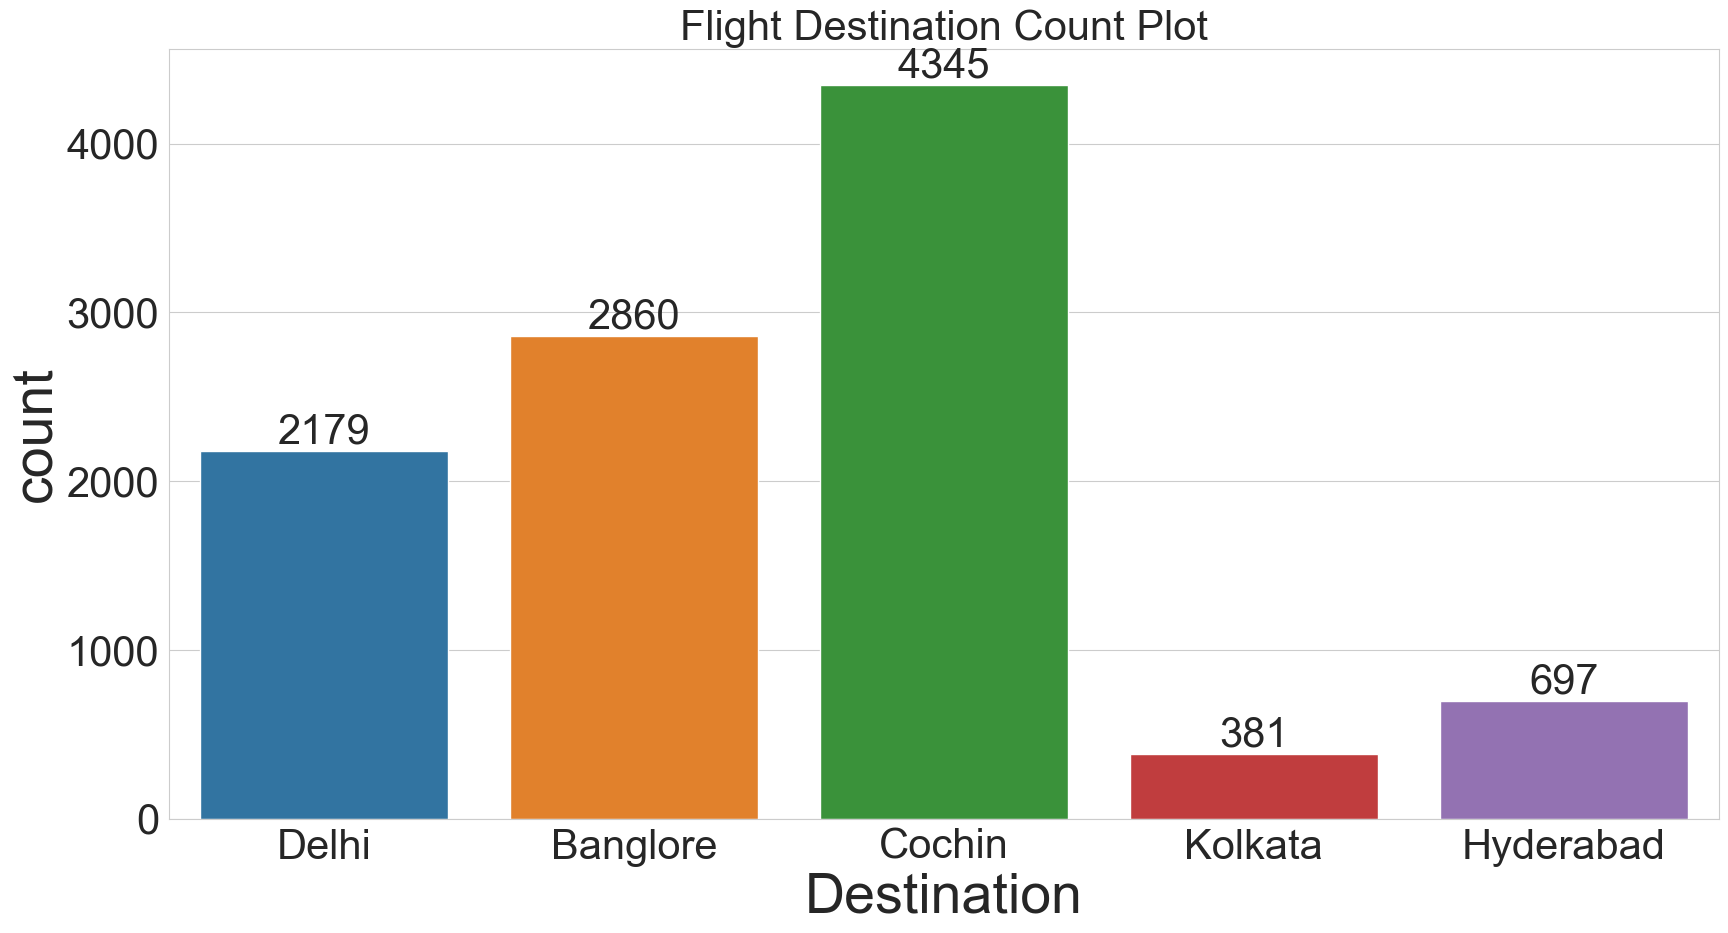

In [20]:
plt.figure(figsize = (20,10))
plt.xlabel('Destination of Flight', fontsize = 40)
plt.ylabel('Count', fontsize = 40)
plt.title('Flight Destination Count Plot', fontsize = 30)
plt.xticks(fontsize = 30)
plt.yticks(fontsize = 30)
ax = sns.countplot(x = data['Destination'])
ax.bar_label(ax.containers[0], size = 30)

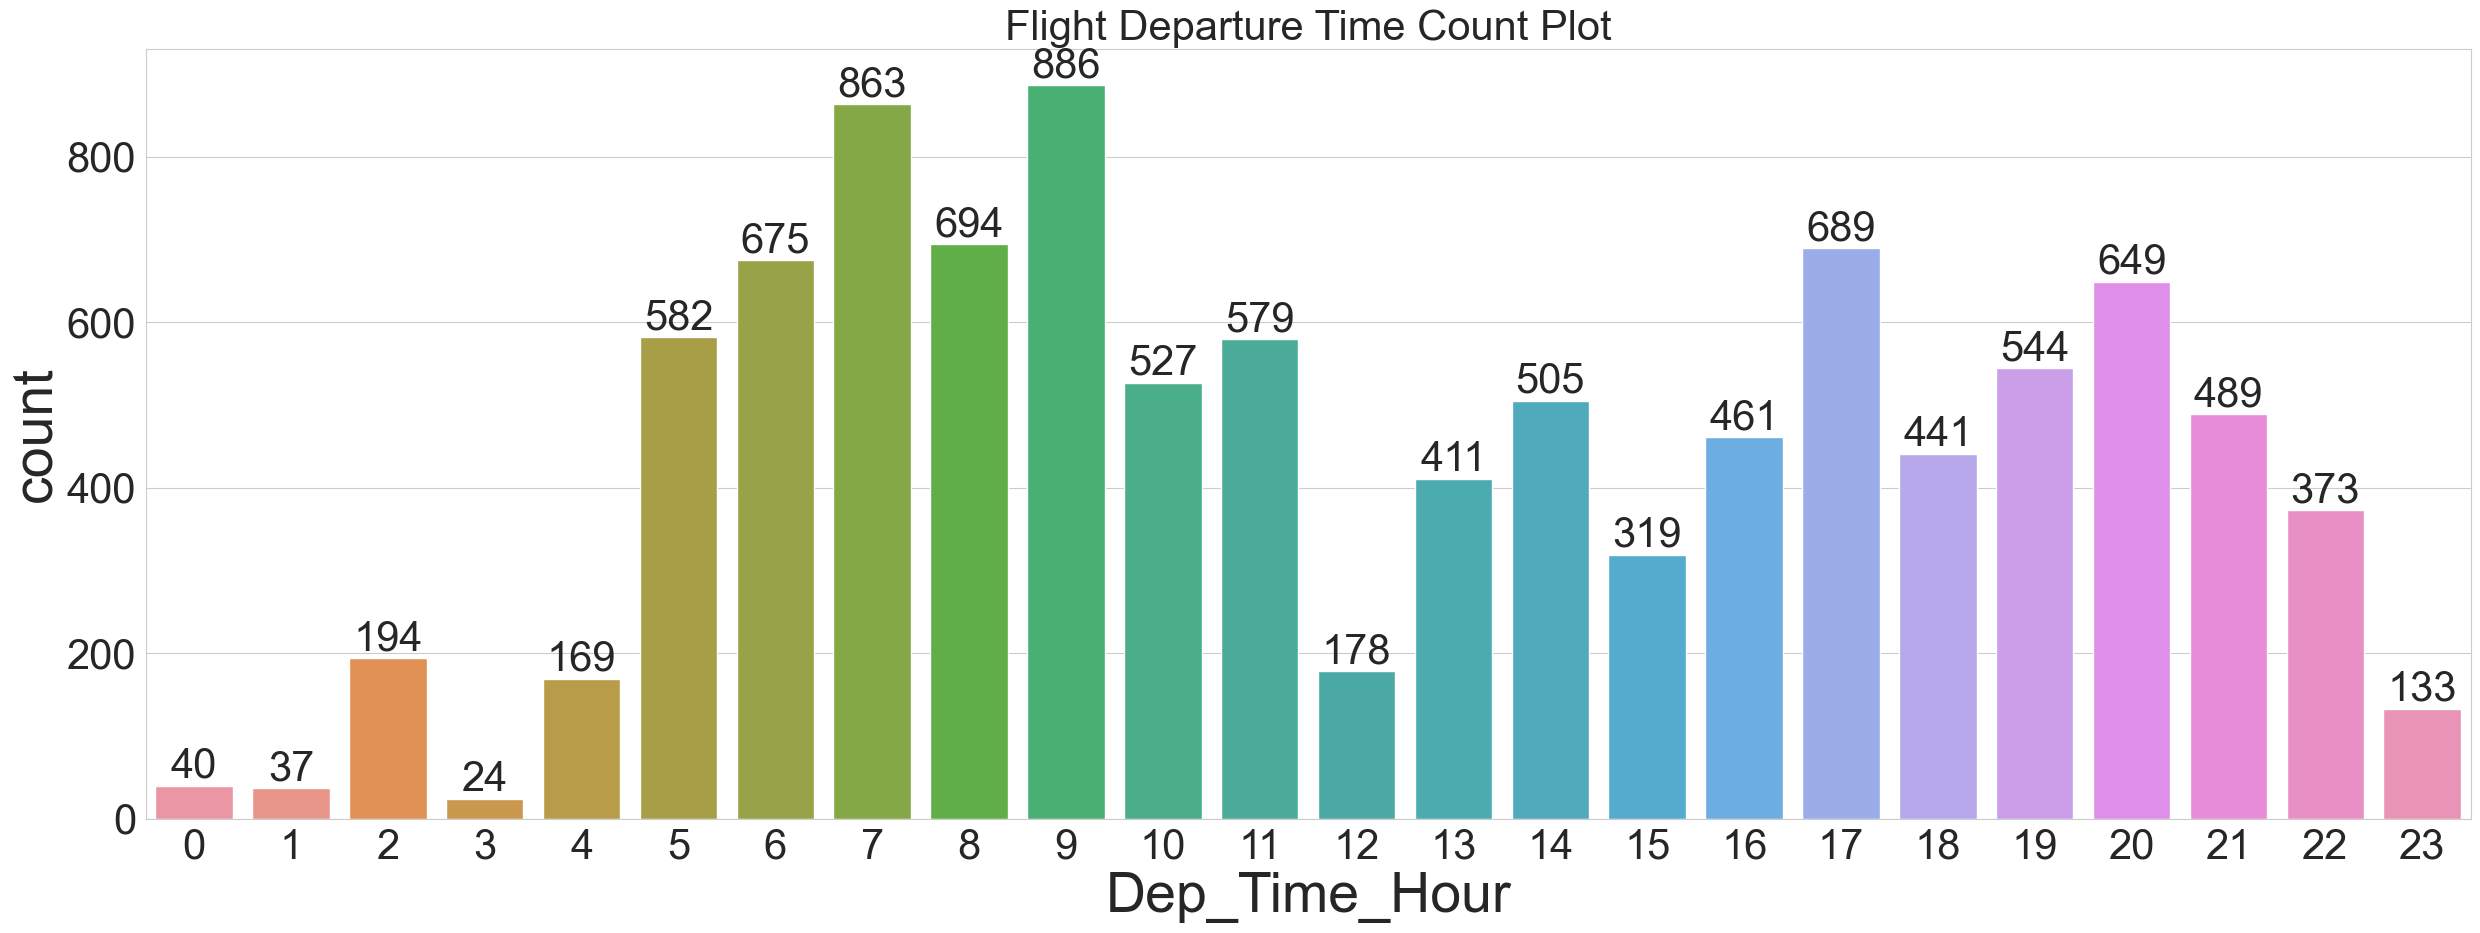

In [21]:
plt.figure(figsize = (30,10))
plt.xlabel('Departure Time of Flight', fontsize = 40)
plt.ylabel('Count', fontsize = 40)
plt.title('Flight Departure Time Count Plot', fontsize = 30)
plt.xticks(fontsize = 30)
plt.yticks(fontsize = 30)
ax = sns.countplot(x = data['Dep_Time_Hour'])
ax.bar_label(ax.containers[0], size = 30);

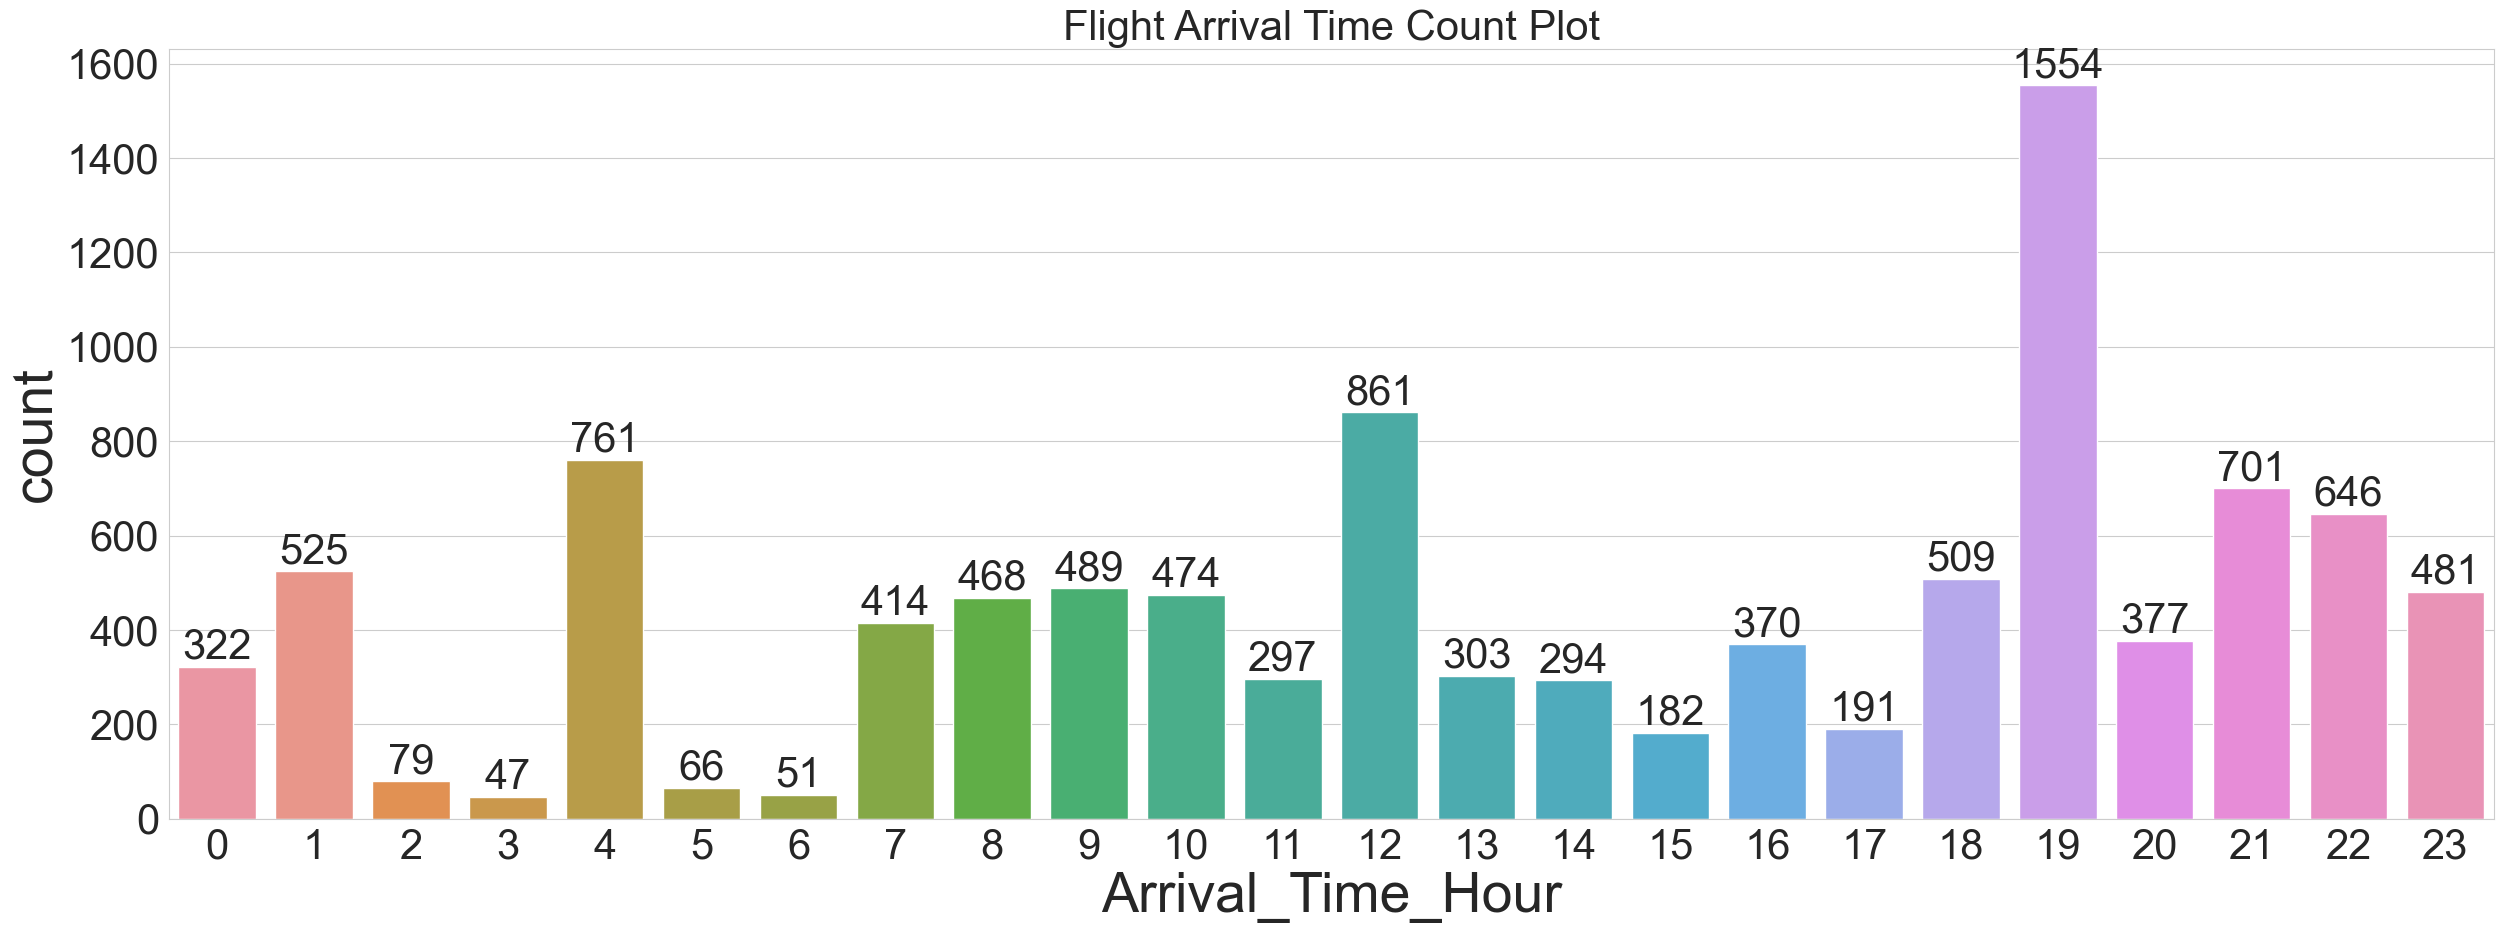

In [22]:
plt.figure(figsize = (30,10))
plt.xlabel('Arrival Time of Flight', fontsize = 40)
plt.ylabel('Count', fontsize = 40)
plt.title('Flight Arrival Time Count Plot', fontsize = 30)
plt.xticks(fontsize = 30)
plt.yticks(fontsize = 30)
ax = sns.countplot(x = data['Arrival_Time_Hour'])
ax.bar_label(ax.containers[0], size = 30);

[Text(0, 0, '1058'),
 Text(0, 0, '835'),
 Text(0, 0, '1268'),
 Text(0, 0, '1375'),
 Text(0, 0, '946'),
 Text(0, 0, '967'),
 Text(0, 0, '814'),
 Text(0, 0, '1085'),
 Text(0, 0, '1022'),
 Text(0, 0, '1092')]

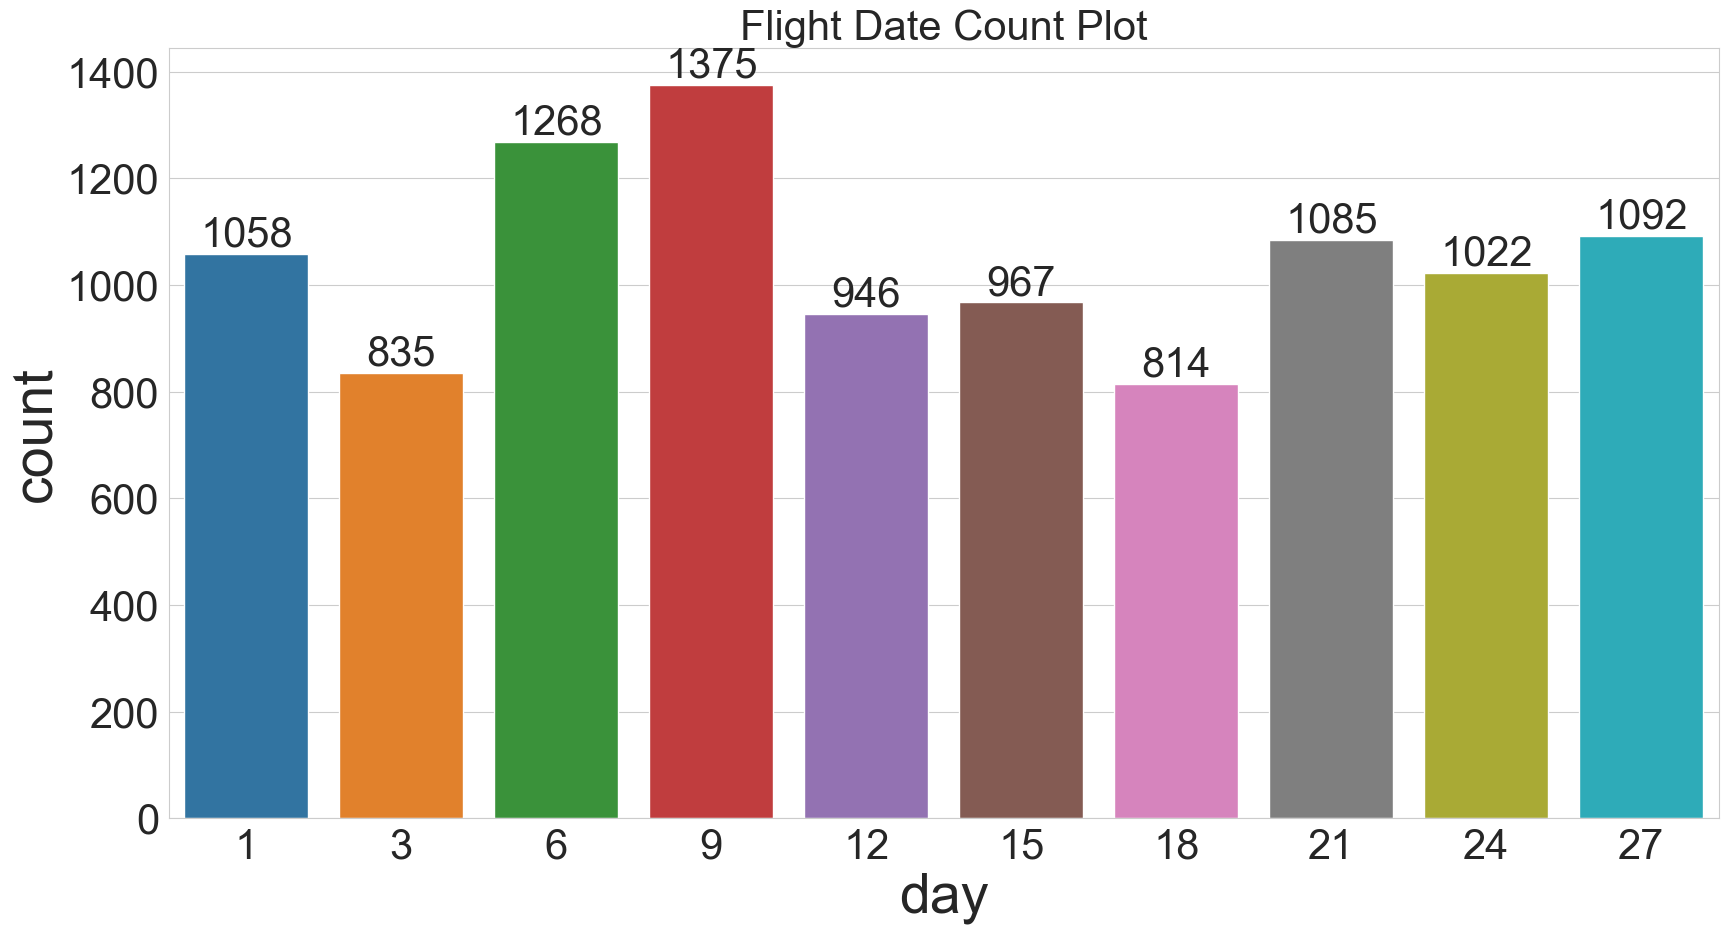

In [23]:
plt.figure(figsize = (20,10))
plt.xlabel('Date of Flight', fontsize = 40)
plt.ylabel('Count', fontsize = 40)
plt.title('Flight Date Count Plot', fontsize = 30)
plt.xticks(fontsize = 30)
plt.yticks(fontsize = 30)
ax = sns.countplot(x = data['day'])
ax.bar_label(ax.containers[0], size = 30)

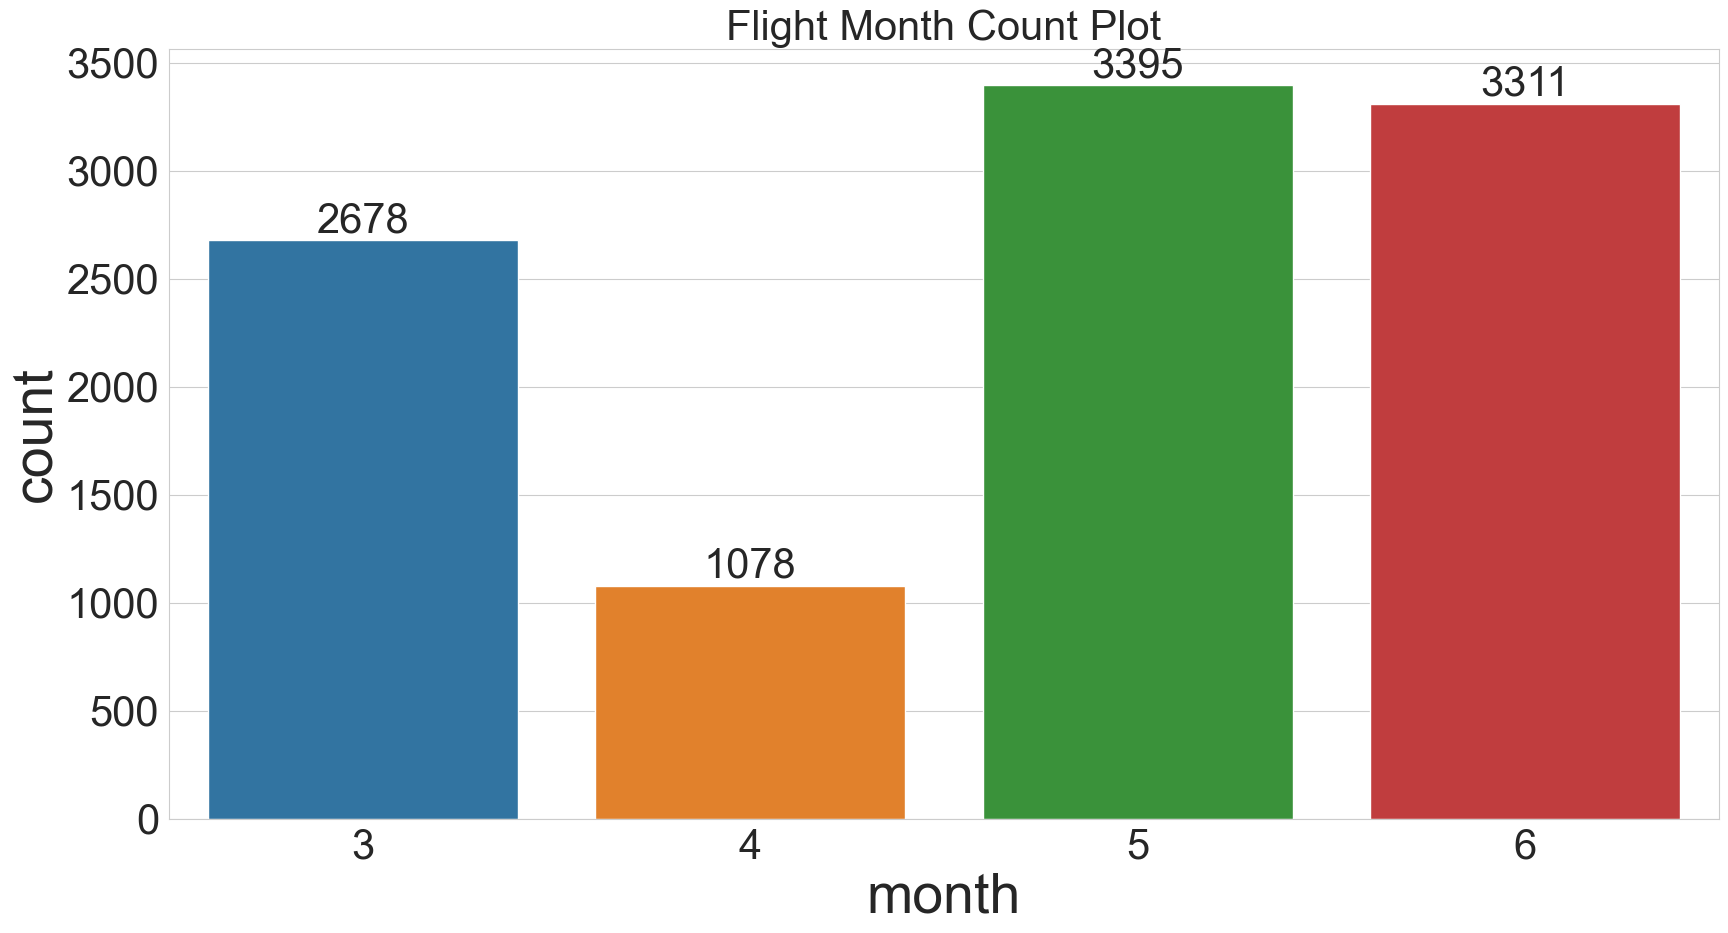

In [24]:
plt.figure(figsize = (20,10))
plt.xlabel('Month of Flight', fontsize = 40)
plt.ylabel('Count', fontsize = 40)
plt.title('Flight Month Count Plot', fontsize = 30)
plt.xticks(fontsize = 30)
plt.yticks(fontsize = 30)
ax = sns.countplot(x = data['month'])
ax.bar_label(ax.containers[0], size = 30);

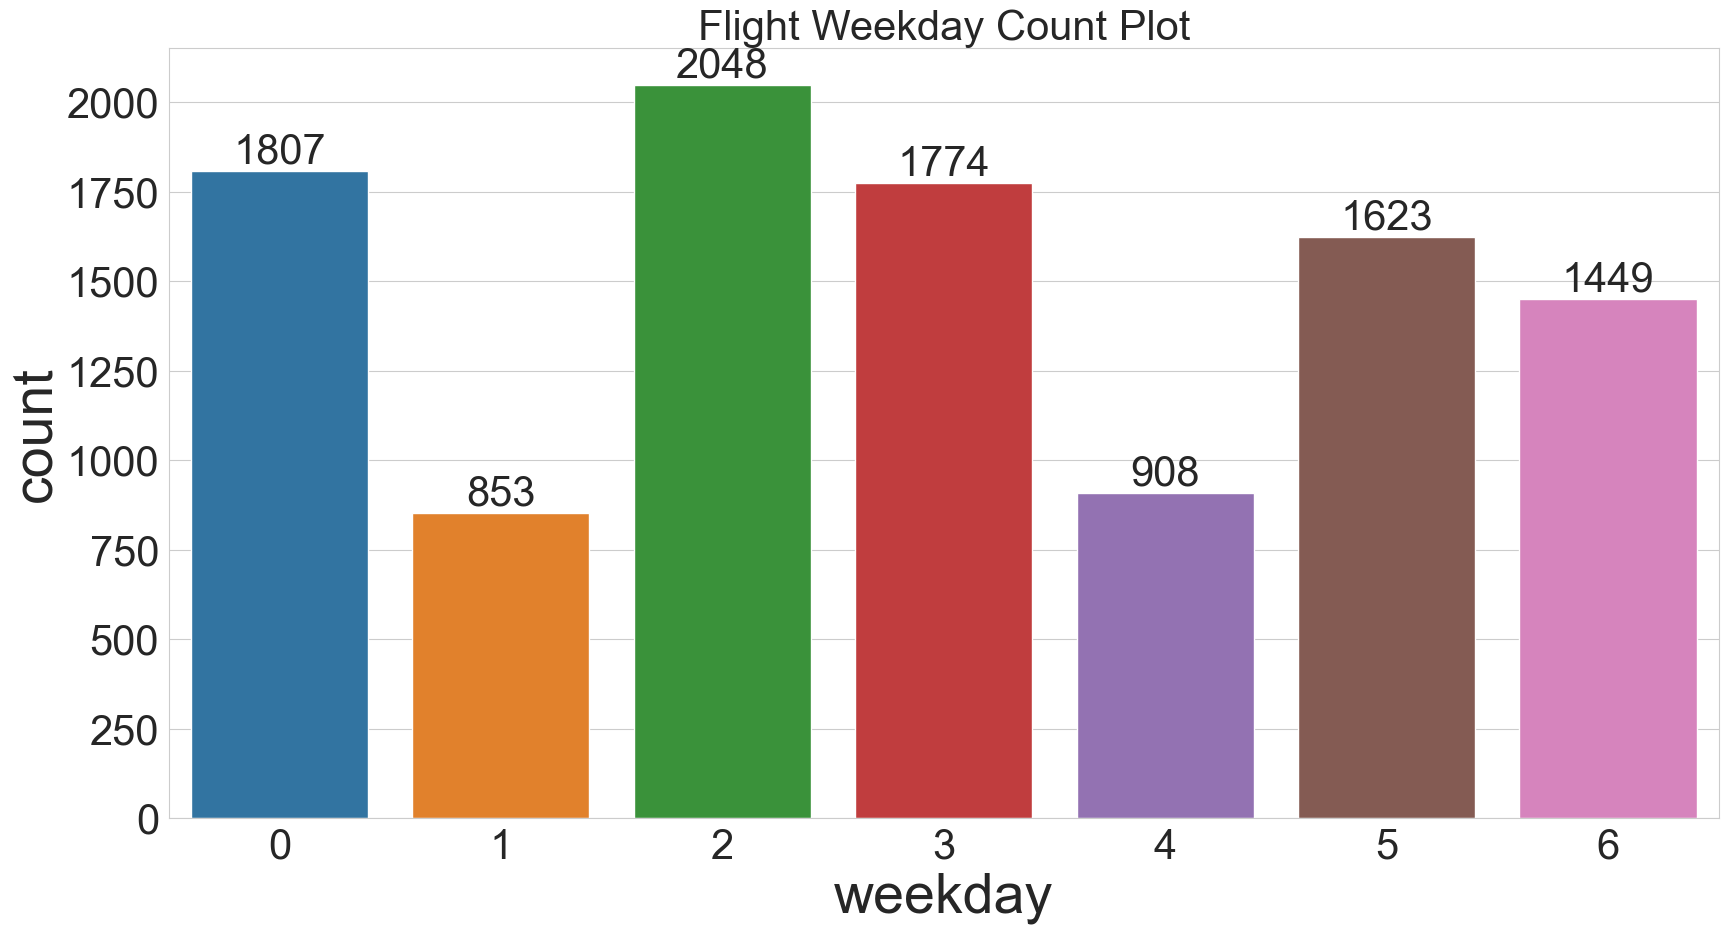

In [25]:
plt.figure(figsize = (20,10))
plt.xlabel('Weekday', fontsize = 40)
plt.ylabel('Count', fontsize = 40)
plt.title('Flight Weekday Count Plot', fontsize = 30)
plt.xticks(fontsize = 30)
plt.yticks(fontsize = 30)
ax = sns.countplot(x = data['weekday'])
ax.bar_label(ax.containers[0], size = 30);
# monday = 0; sunday = 6
# most 

## 2. Categorical Features

<Axes: xlabel='Price', ylabel='Density'>

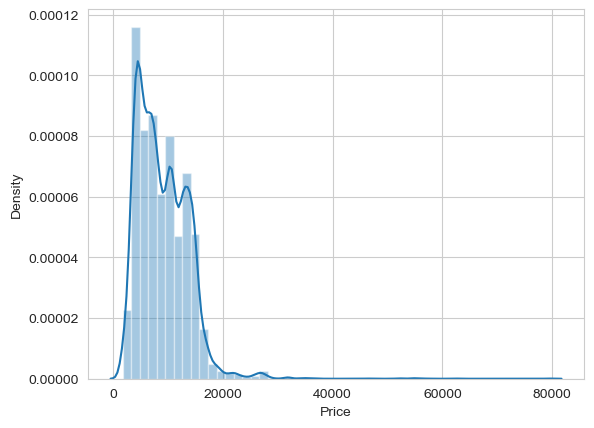

In [26]:
sns.distplot(data['Price'], hist = True)

<Axes: xlabel='Price'>

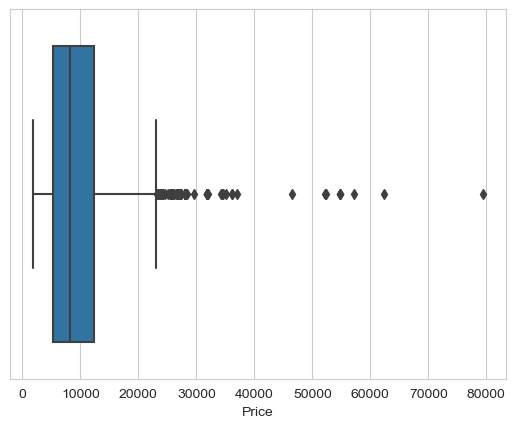

In [27]:
sns.boxplot(x = data['Price'])

### Insights:
- As we can see a lot of outliers are present, the graph is also skewed. Therefore we can impute the median value.

## Outlier handling

In [28]:
data[data['Price'] > 40000].shape

(9, 20)

In [29]:
data['Price'] = np.where(data['Price'] > 40000, data['Price'].median(), data['Price'])

<Axes: xlabel='Price'>

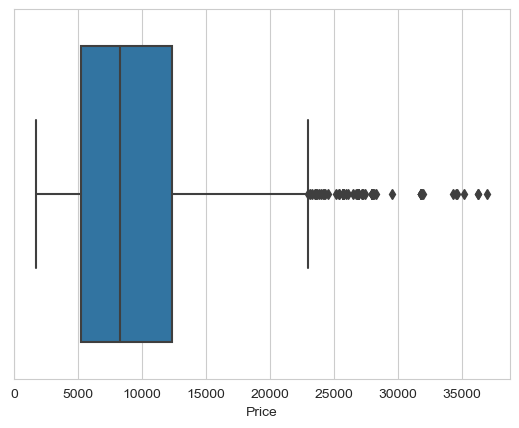

In [30]:
sns.boxplot(x= data['Price'])

### Insights:
1. Jet Airways is the most frequently used airline, followed by Indigo.
2. Majority of flights have only one stop.
3. Delhi is the Source location where majority of flights depart.
4. Cochin is the most popular destination for flights.
5. In the morning between 6 AM to 10 AM, maximum flights take off.
6. The peak landing time for most flights throughout the day is 12 PM and 7 PM.
7. The 5th and 6th months of the year, that is, May and June have been the busiest months.
8. Wednesday, followed by Monday have been observed to be the busiest weekdays.
9. The first 10 days of the months are observed to be the busiest.
10. Price is mostly below 25,000 with the median value being approximately 8000. There are a few flights in the range 25000-40000 and even fewer outliers having price above 40000. The Outlier values above 40k are handled by imputing the median values inplace of it.

## Bivariate Analysis

<Axes: title={'center': 'Airline vs Price Plot'}, xlabel='Airline', ylabel='Price'>

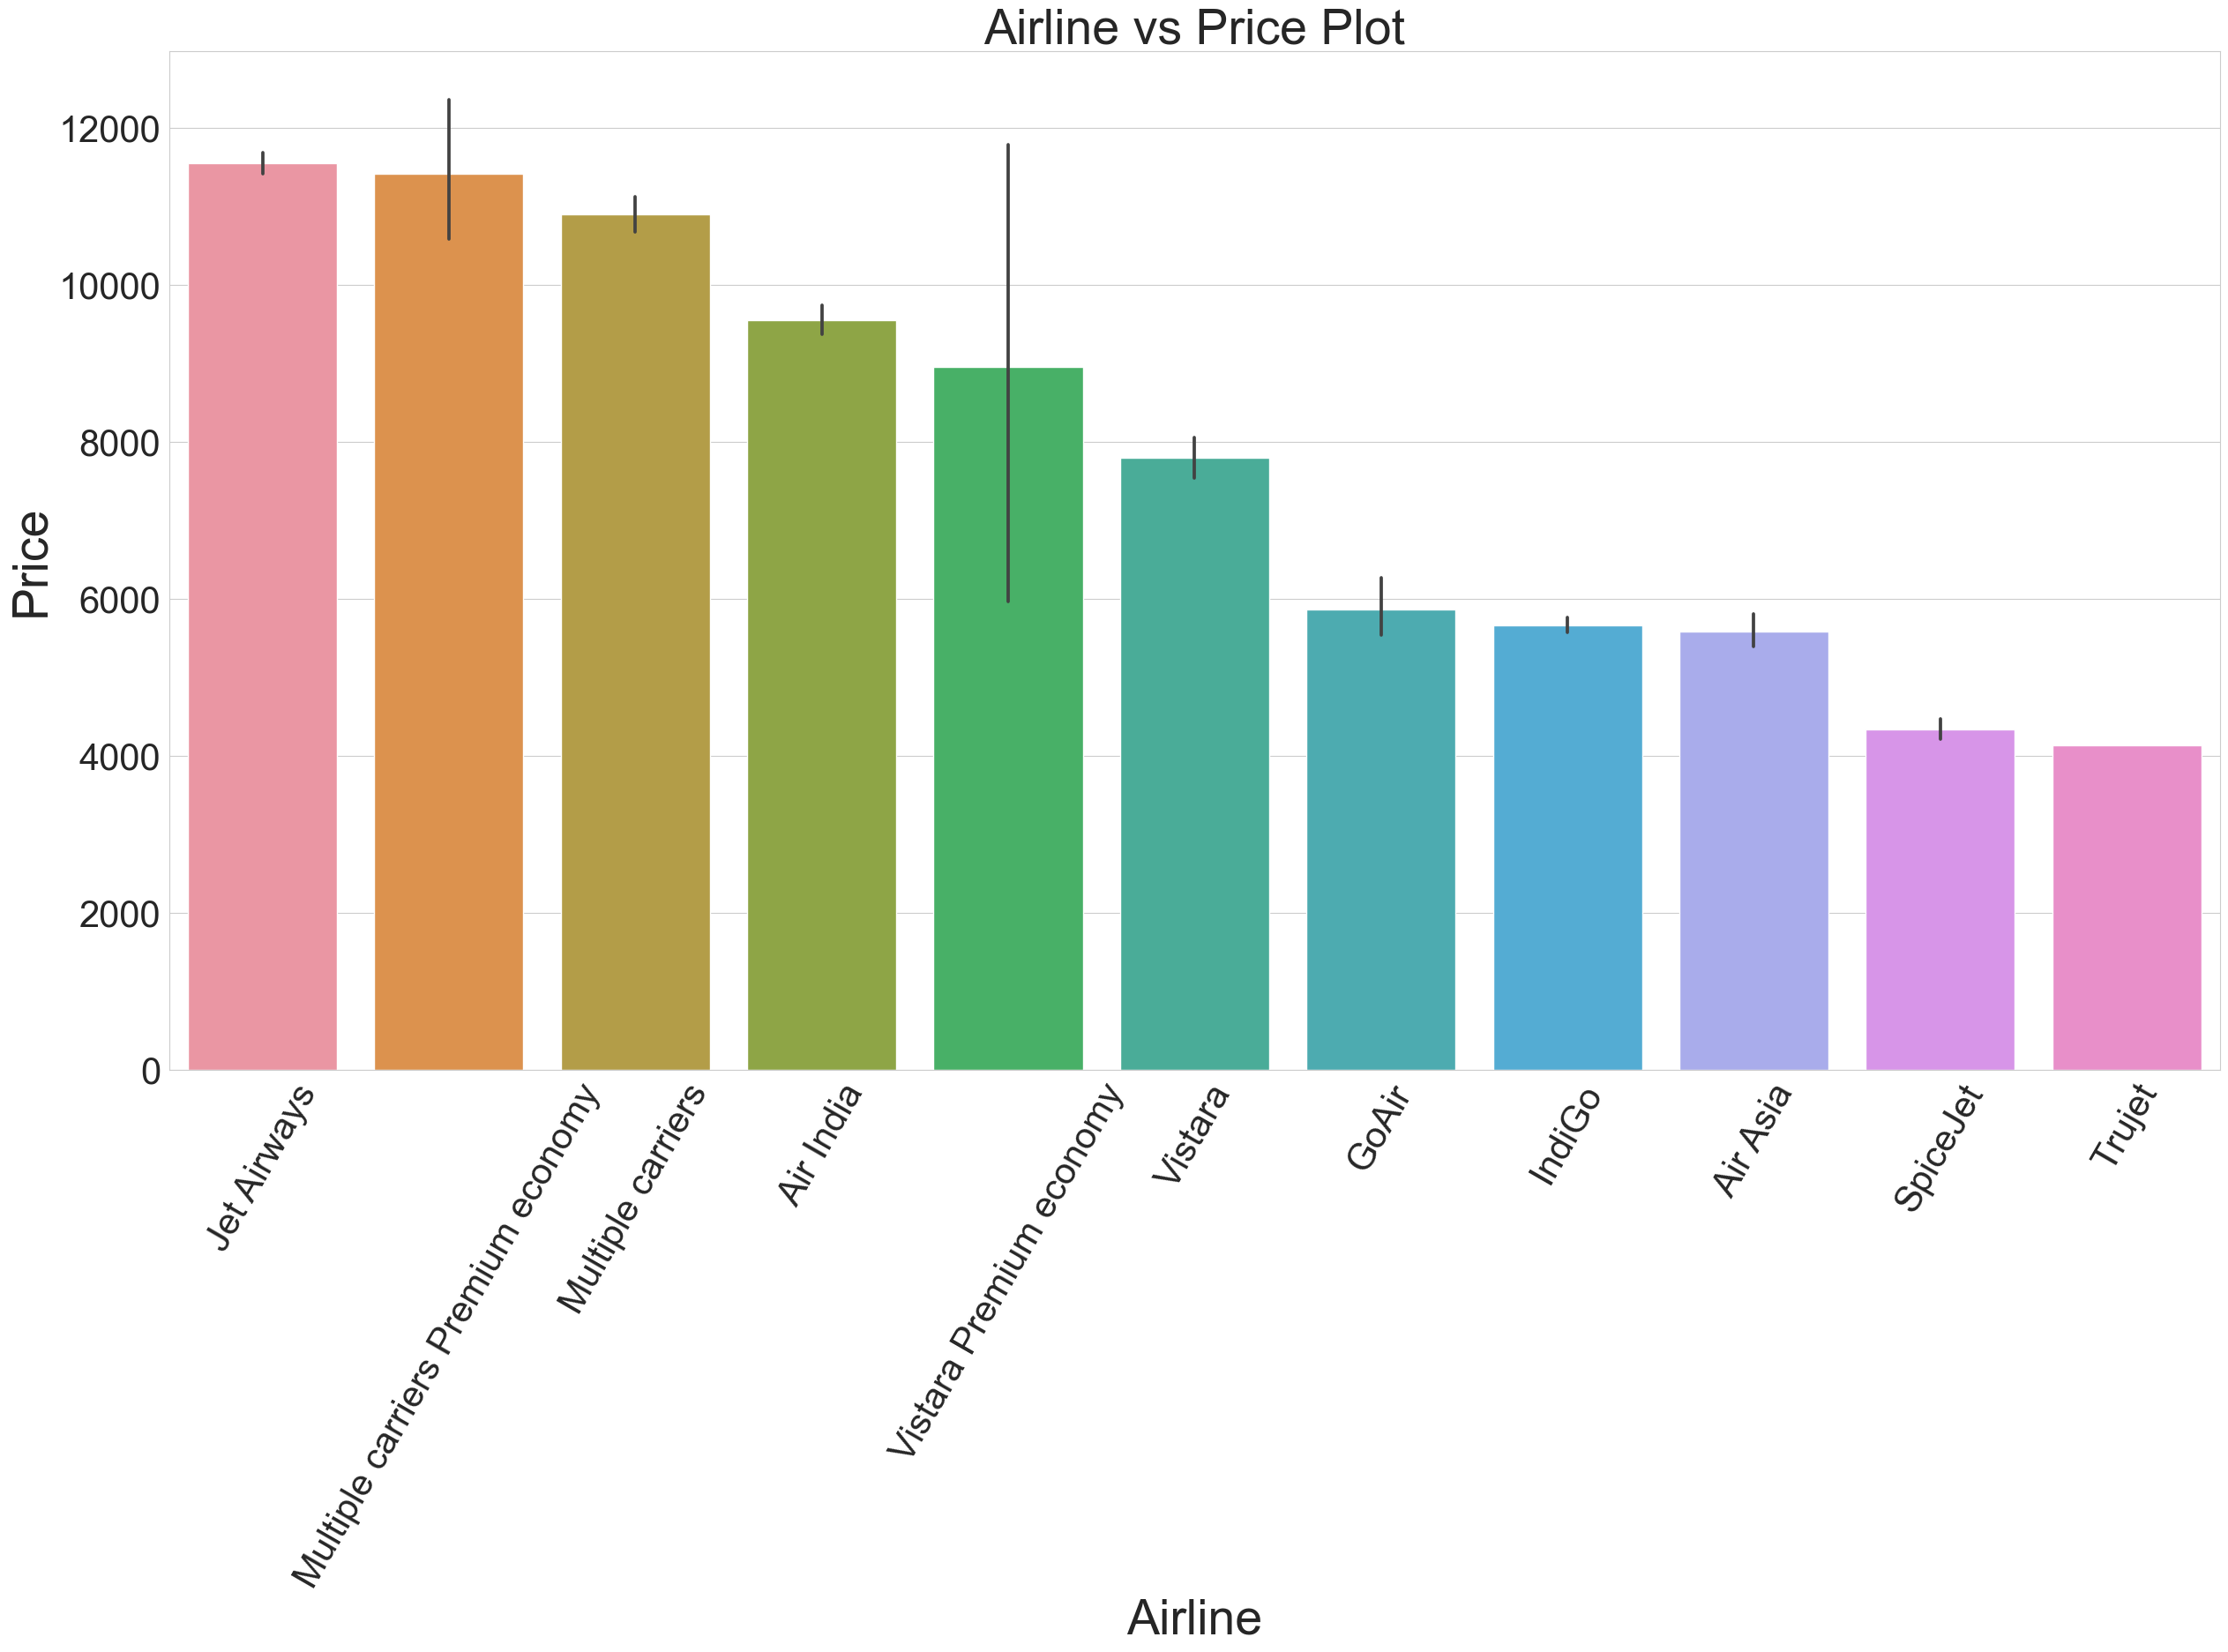

In [31]:
plt.figure(figsize = (30,15))
plt.xlabel('Airline', fontsize = 40)
plt.ylabel('Price', fontsize = 40)
plt.title('Airline vs Price Plot', fontsize = 40)
plt.xticks(rotation = 60, fontsize = 30)
plt.yticks(fontsize = 30)
sns.barplot(x = data['Airline'], y = data['Price'], order = data.groupby('Airline')['Price'].mean().sort_values(ascending = False).index)

<Axes: title={'center': 'Source vs Price Plot'}, xlabel='Source', ylabel='Price'>

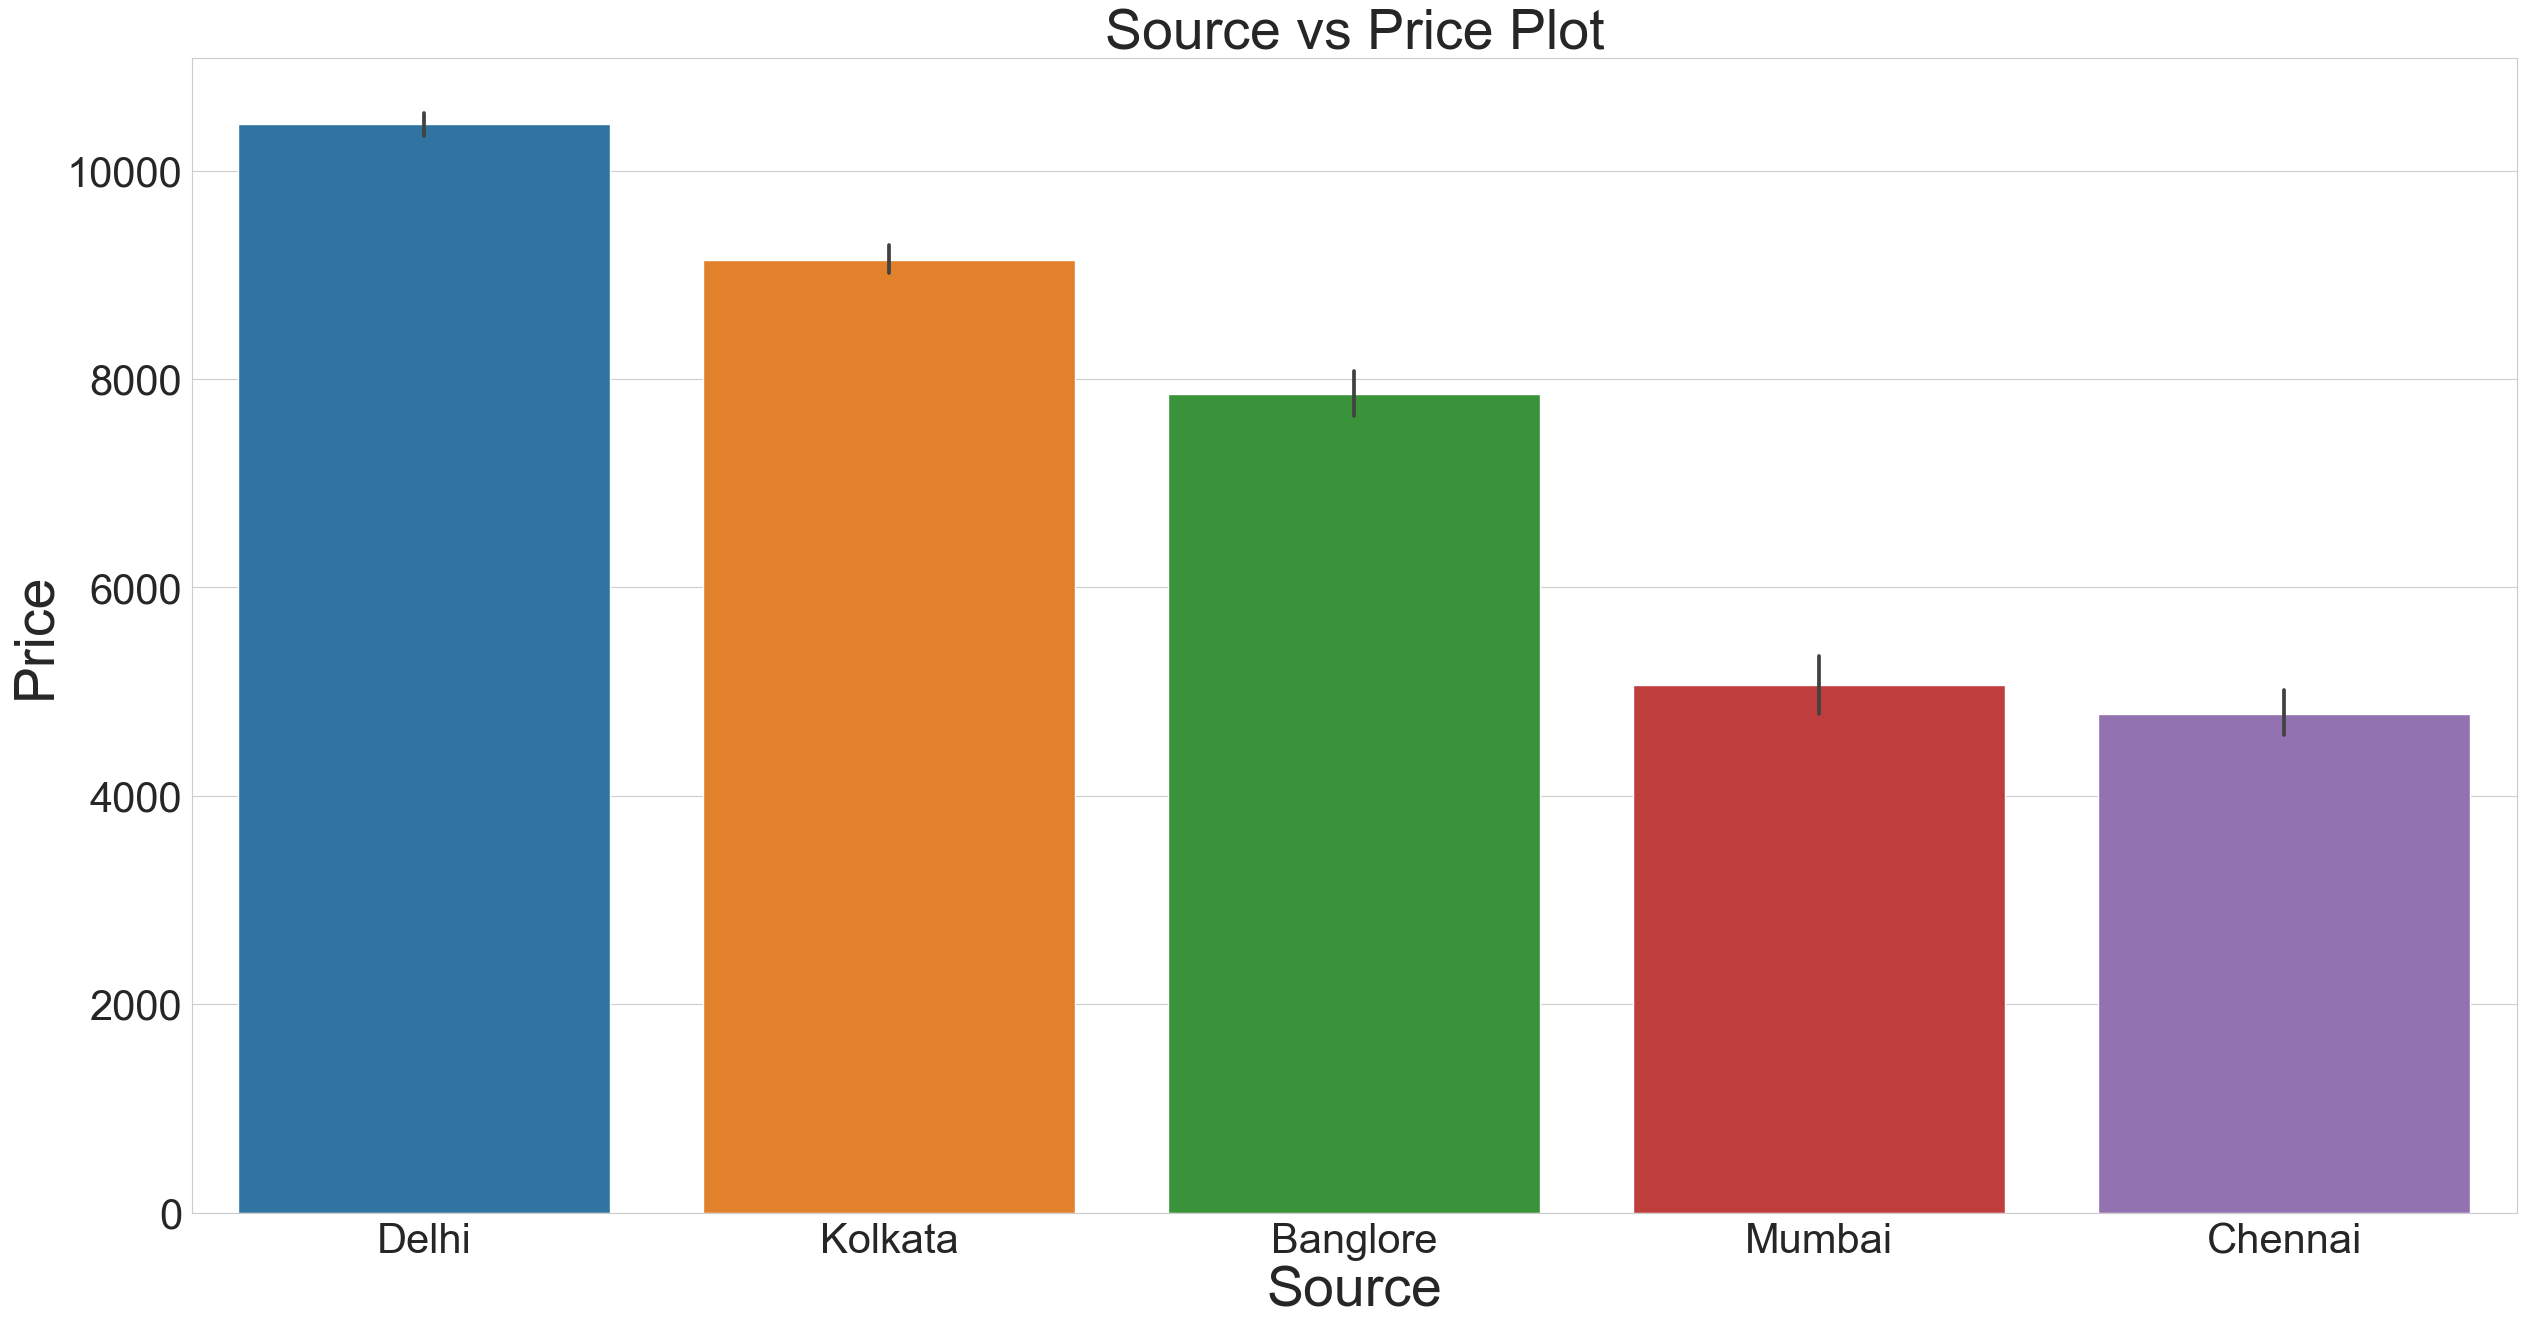

In [32]:
plt.figure(figsize = (30,15))
plt.xlabel('Source', fontsize = 40)
plt.ylabel('Price', fontsize = 40)
plt.title('Source vs Price Plot', fontsize = 40)
plt.xticks(fontsize = 30)
plt.yticks(fontsize = 30)
sns.barplot(x = data['Source'], y = data['Price'], order = data.groupby('Source')['Price'].mean().sort_values(ascending = False).index)

<Axes: title={'center': 'Destination vs Price Plot'}, xlabel='Destination', ylabel='Price'>

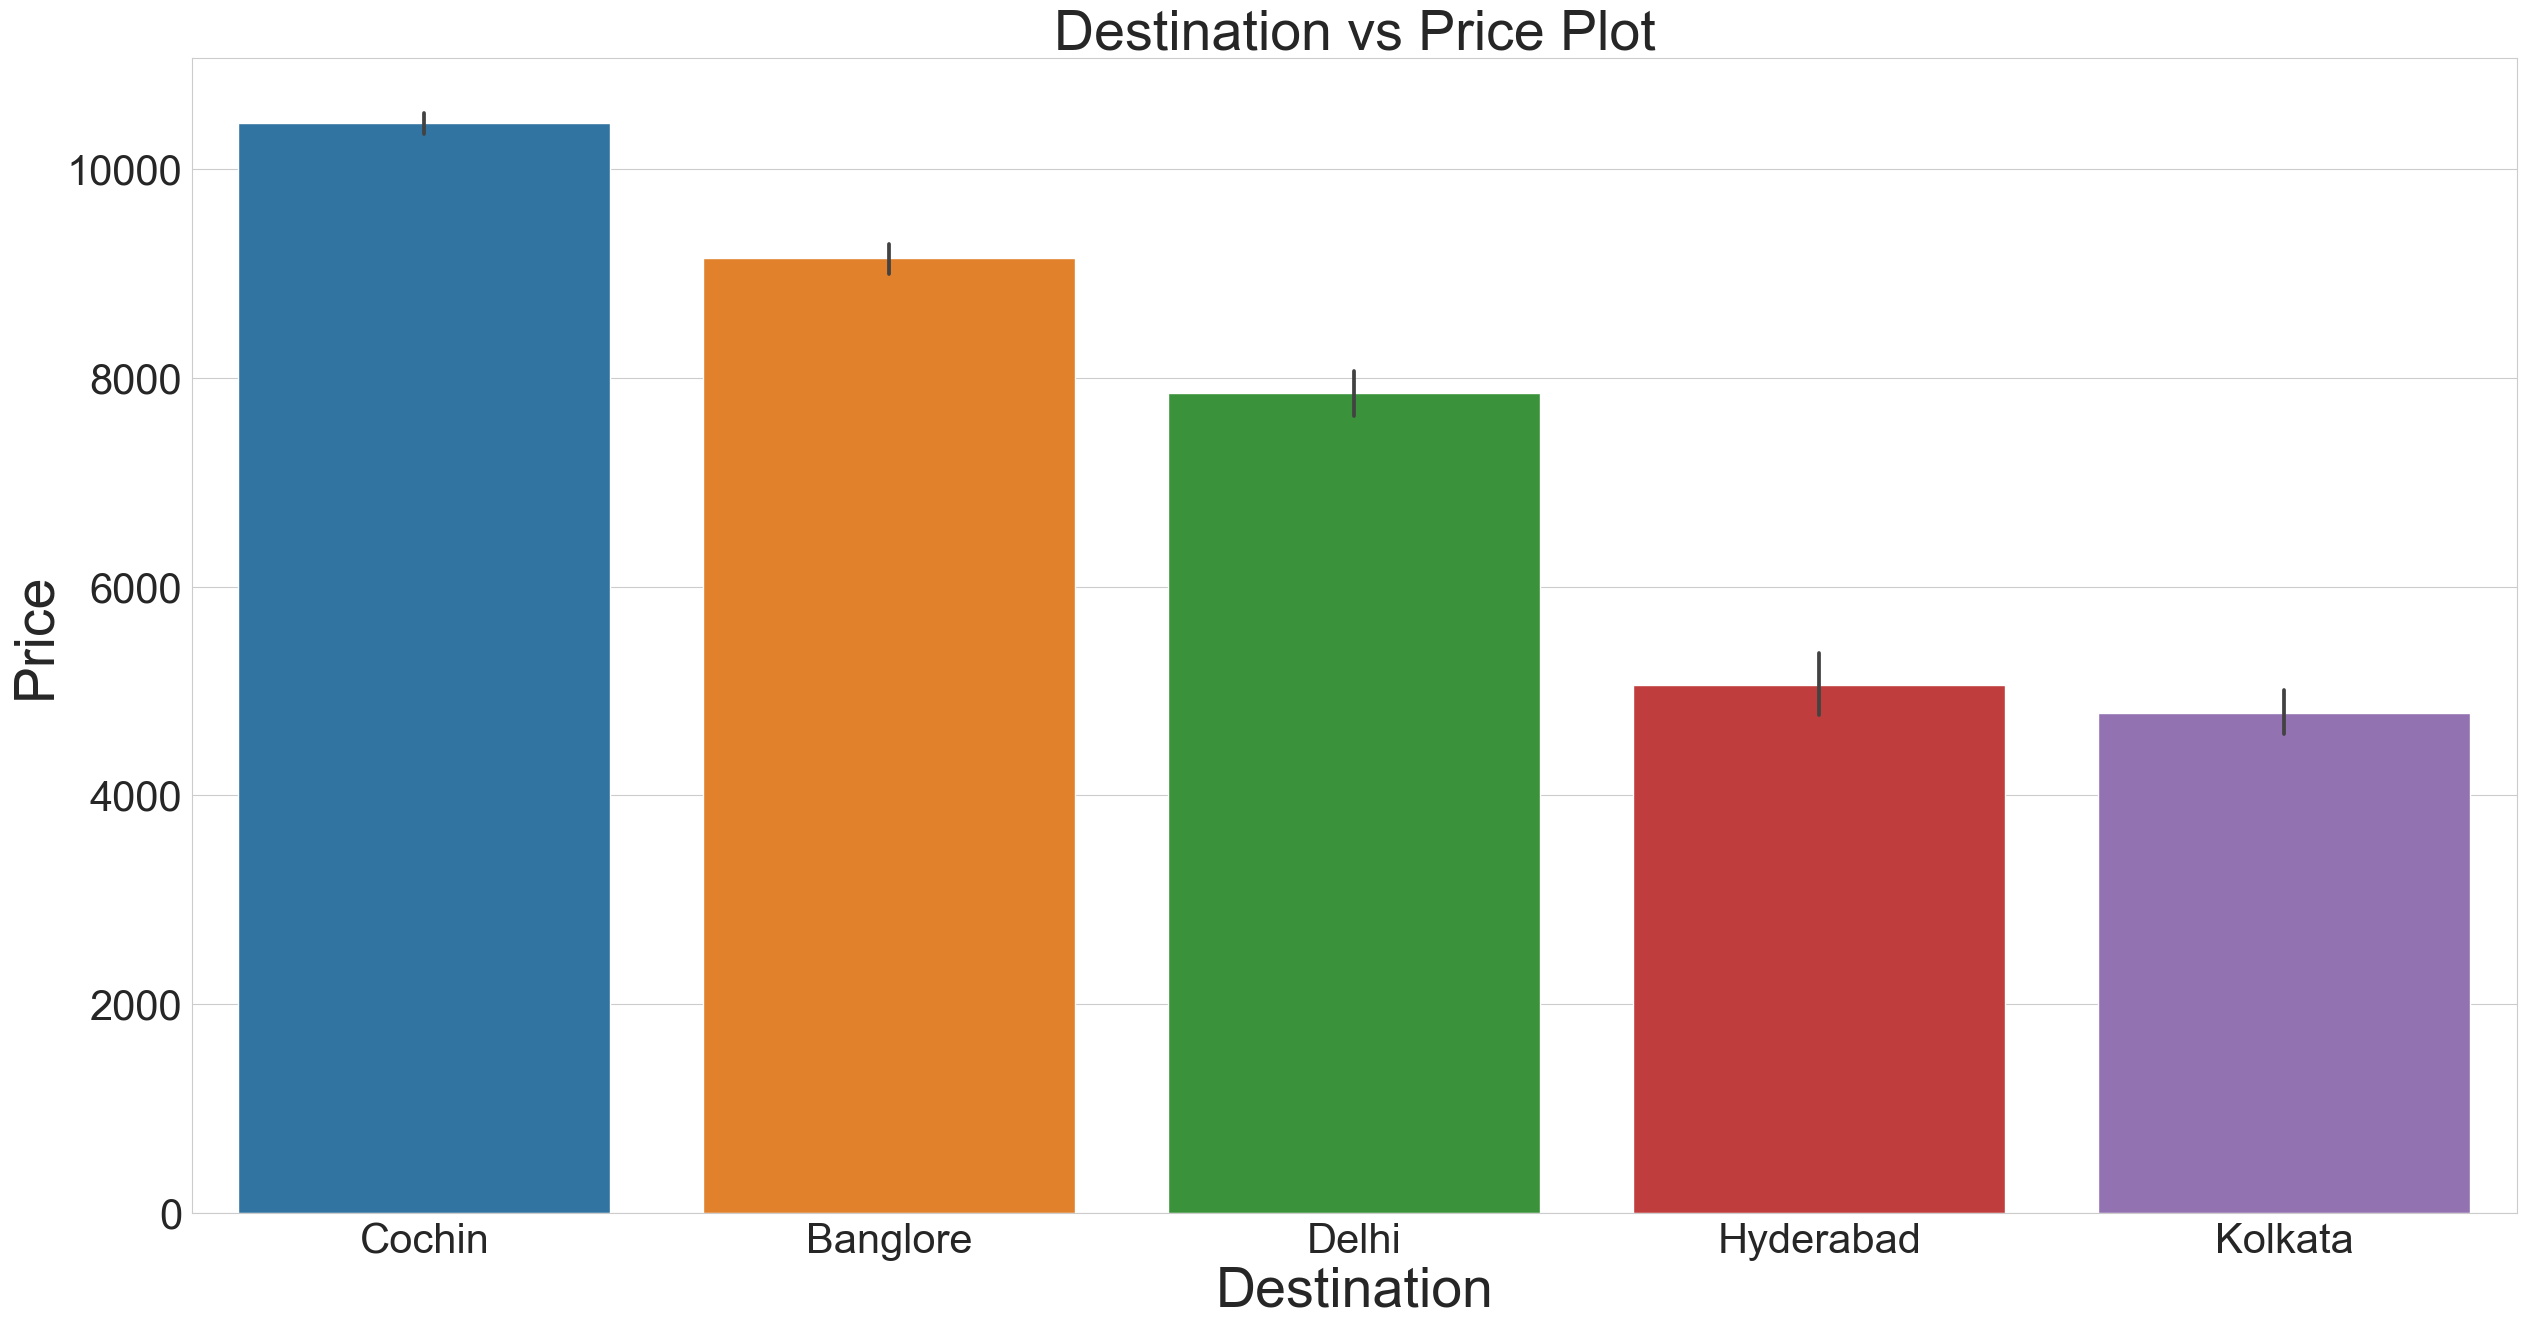

In [33]:
plt.figure(figsize = (30,15))
plt.xlabel('Destination', fontsize = 40)
plt.ylabel('Price', fontsize = 40)
plt.title('Destination vs Price Plot', fontsize = 40)
plt.xticks(fontsize = 30)
plt.yticks(fontsize = 30)
sns.barplot(x = data['Destination'], y = data['Price'], order = data.groupby('Destination')['Price'].mean().sort_values(ascending = False).index)

<Axes: title={'center': 'Total Stops vs Price Plot'}, xlabel='Total_Stops', ylabel='Price'>

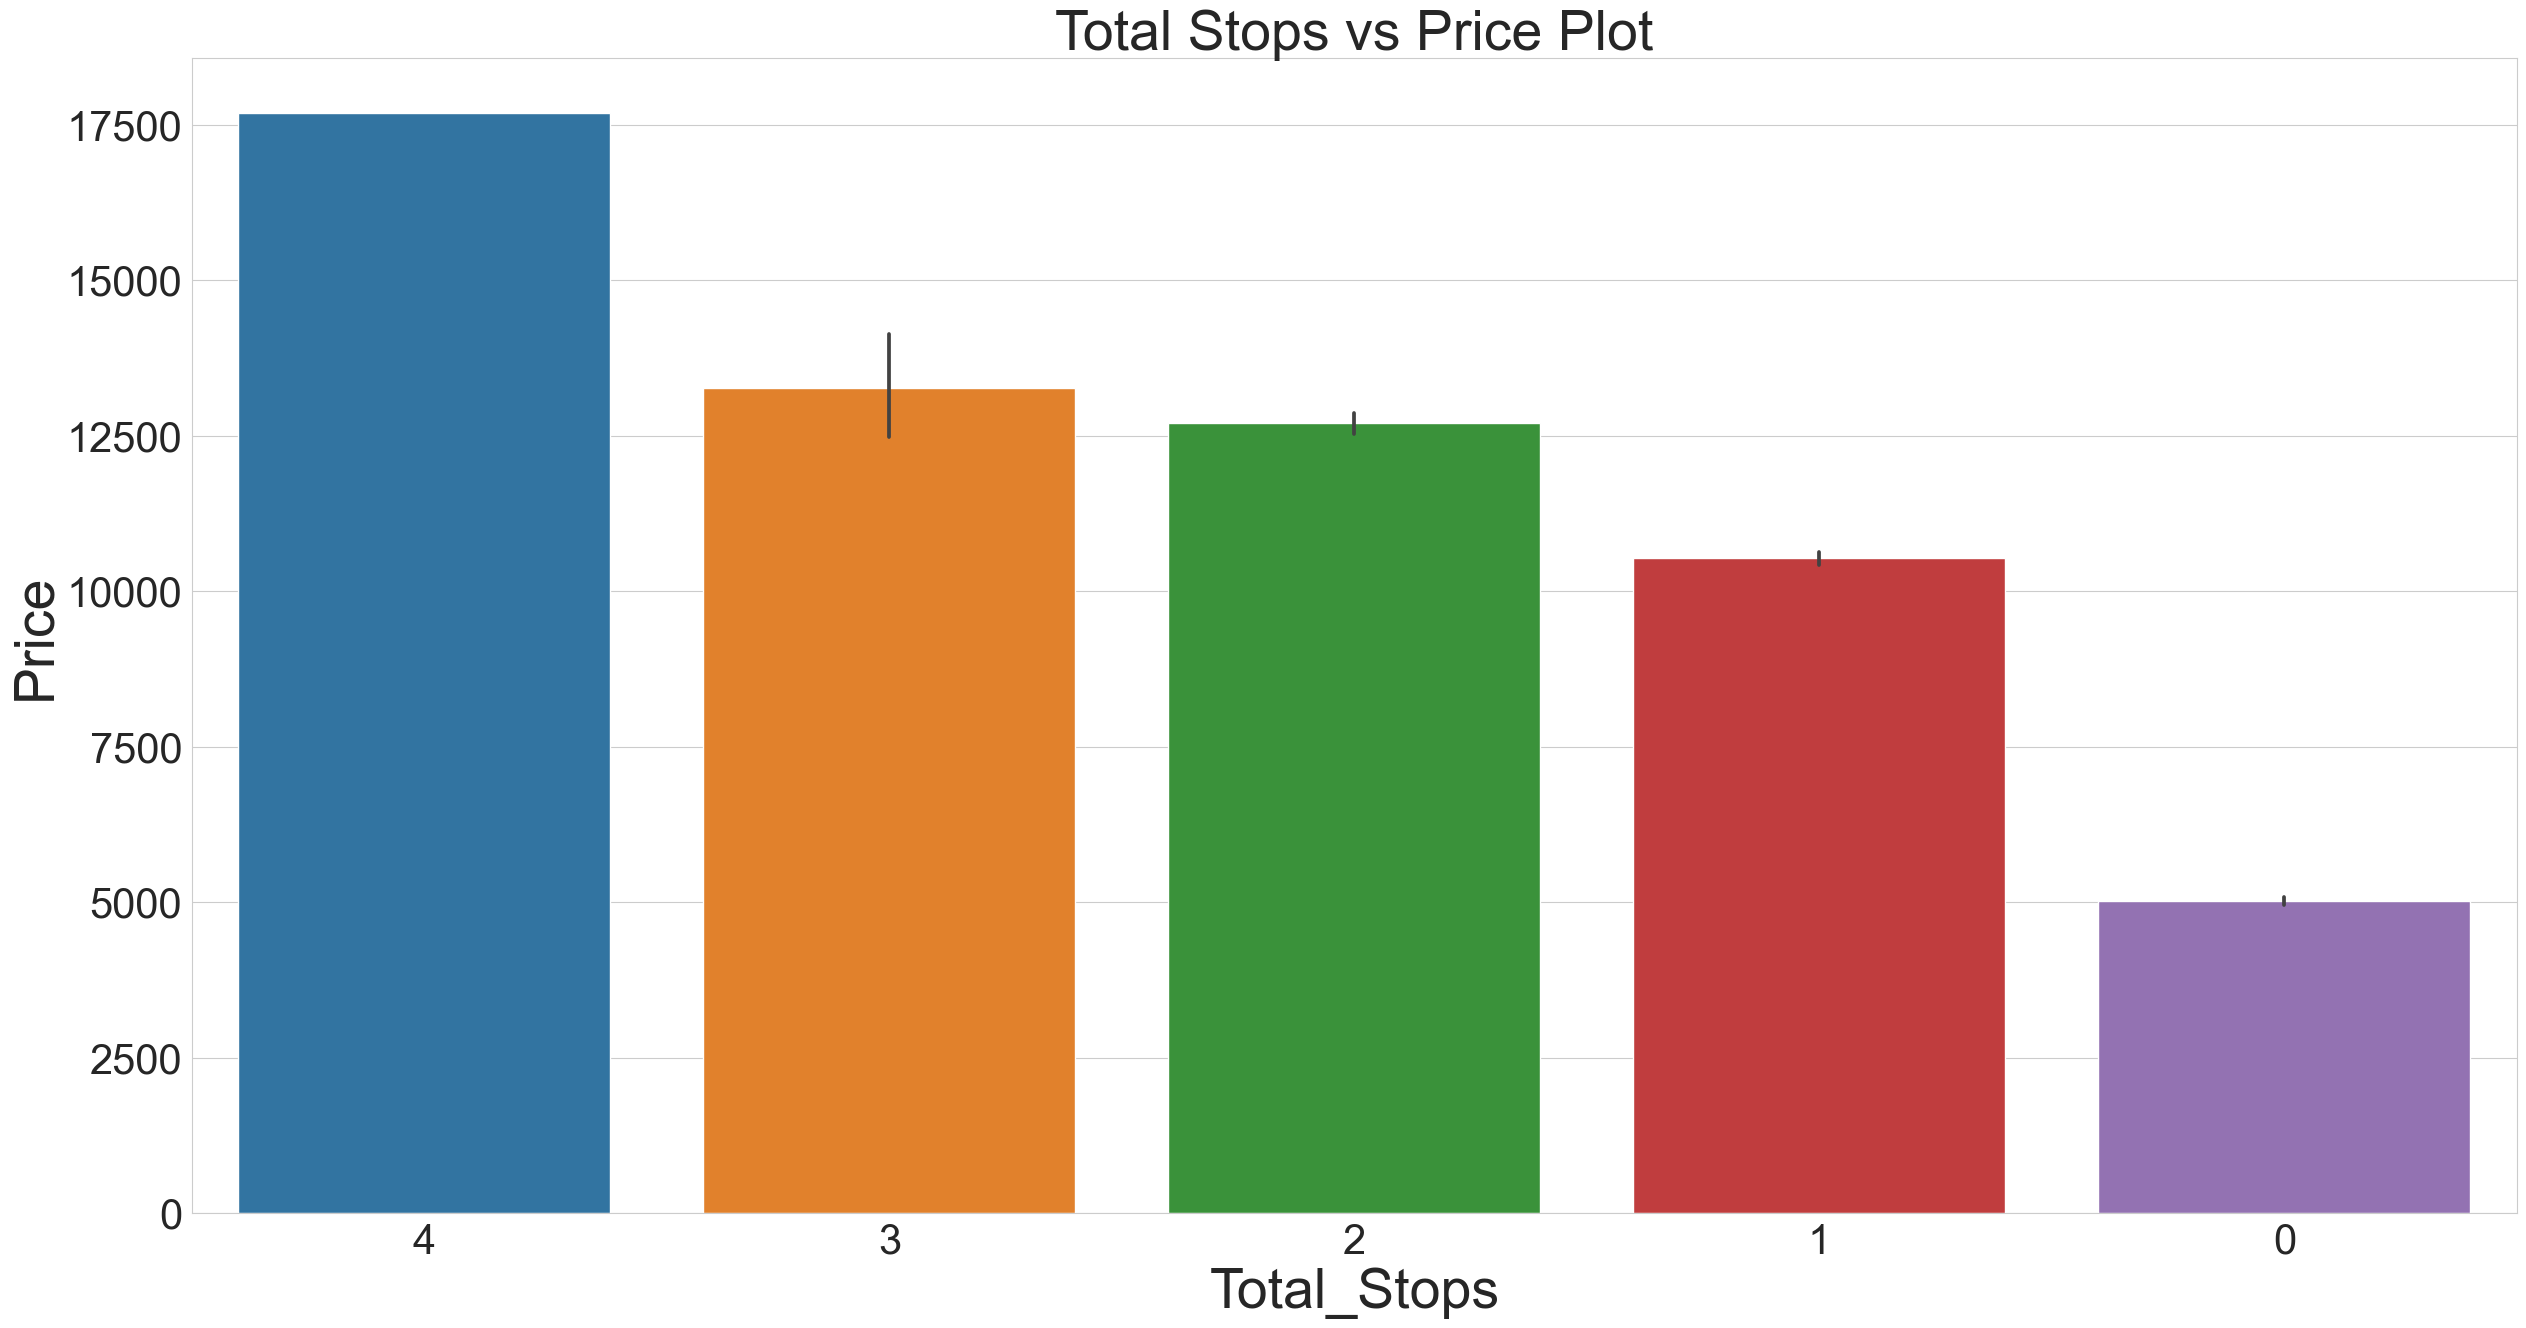

In [34]:
plt.figure(figsize = (30,15))
plt.xlabel('Total Stops', fontsize = 40)
plt.ylabel('Price', fontsize = 40)
plt.title('Total Stops vs Price Plot', fontsize = 40)
plt.xticks(fontsize = 30)
plt.yticks(fontsize = 30)
sns.barplot(x = data['Total_Stops'], y = data['Price'], order = data.groupby('Total_Stops')['Price'].mean().sort_values(ascending = False).index)

<Axes: title={'center': 'Airline vs Dration Hours Plot'}, xlabel='Airline', ylabel='Duration_Total_Hours'>

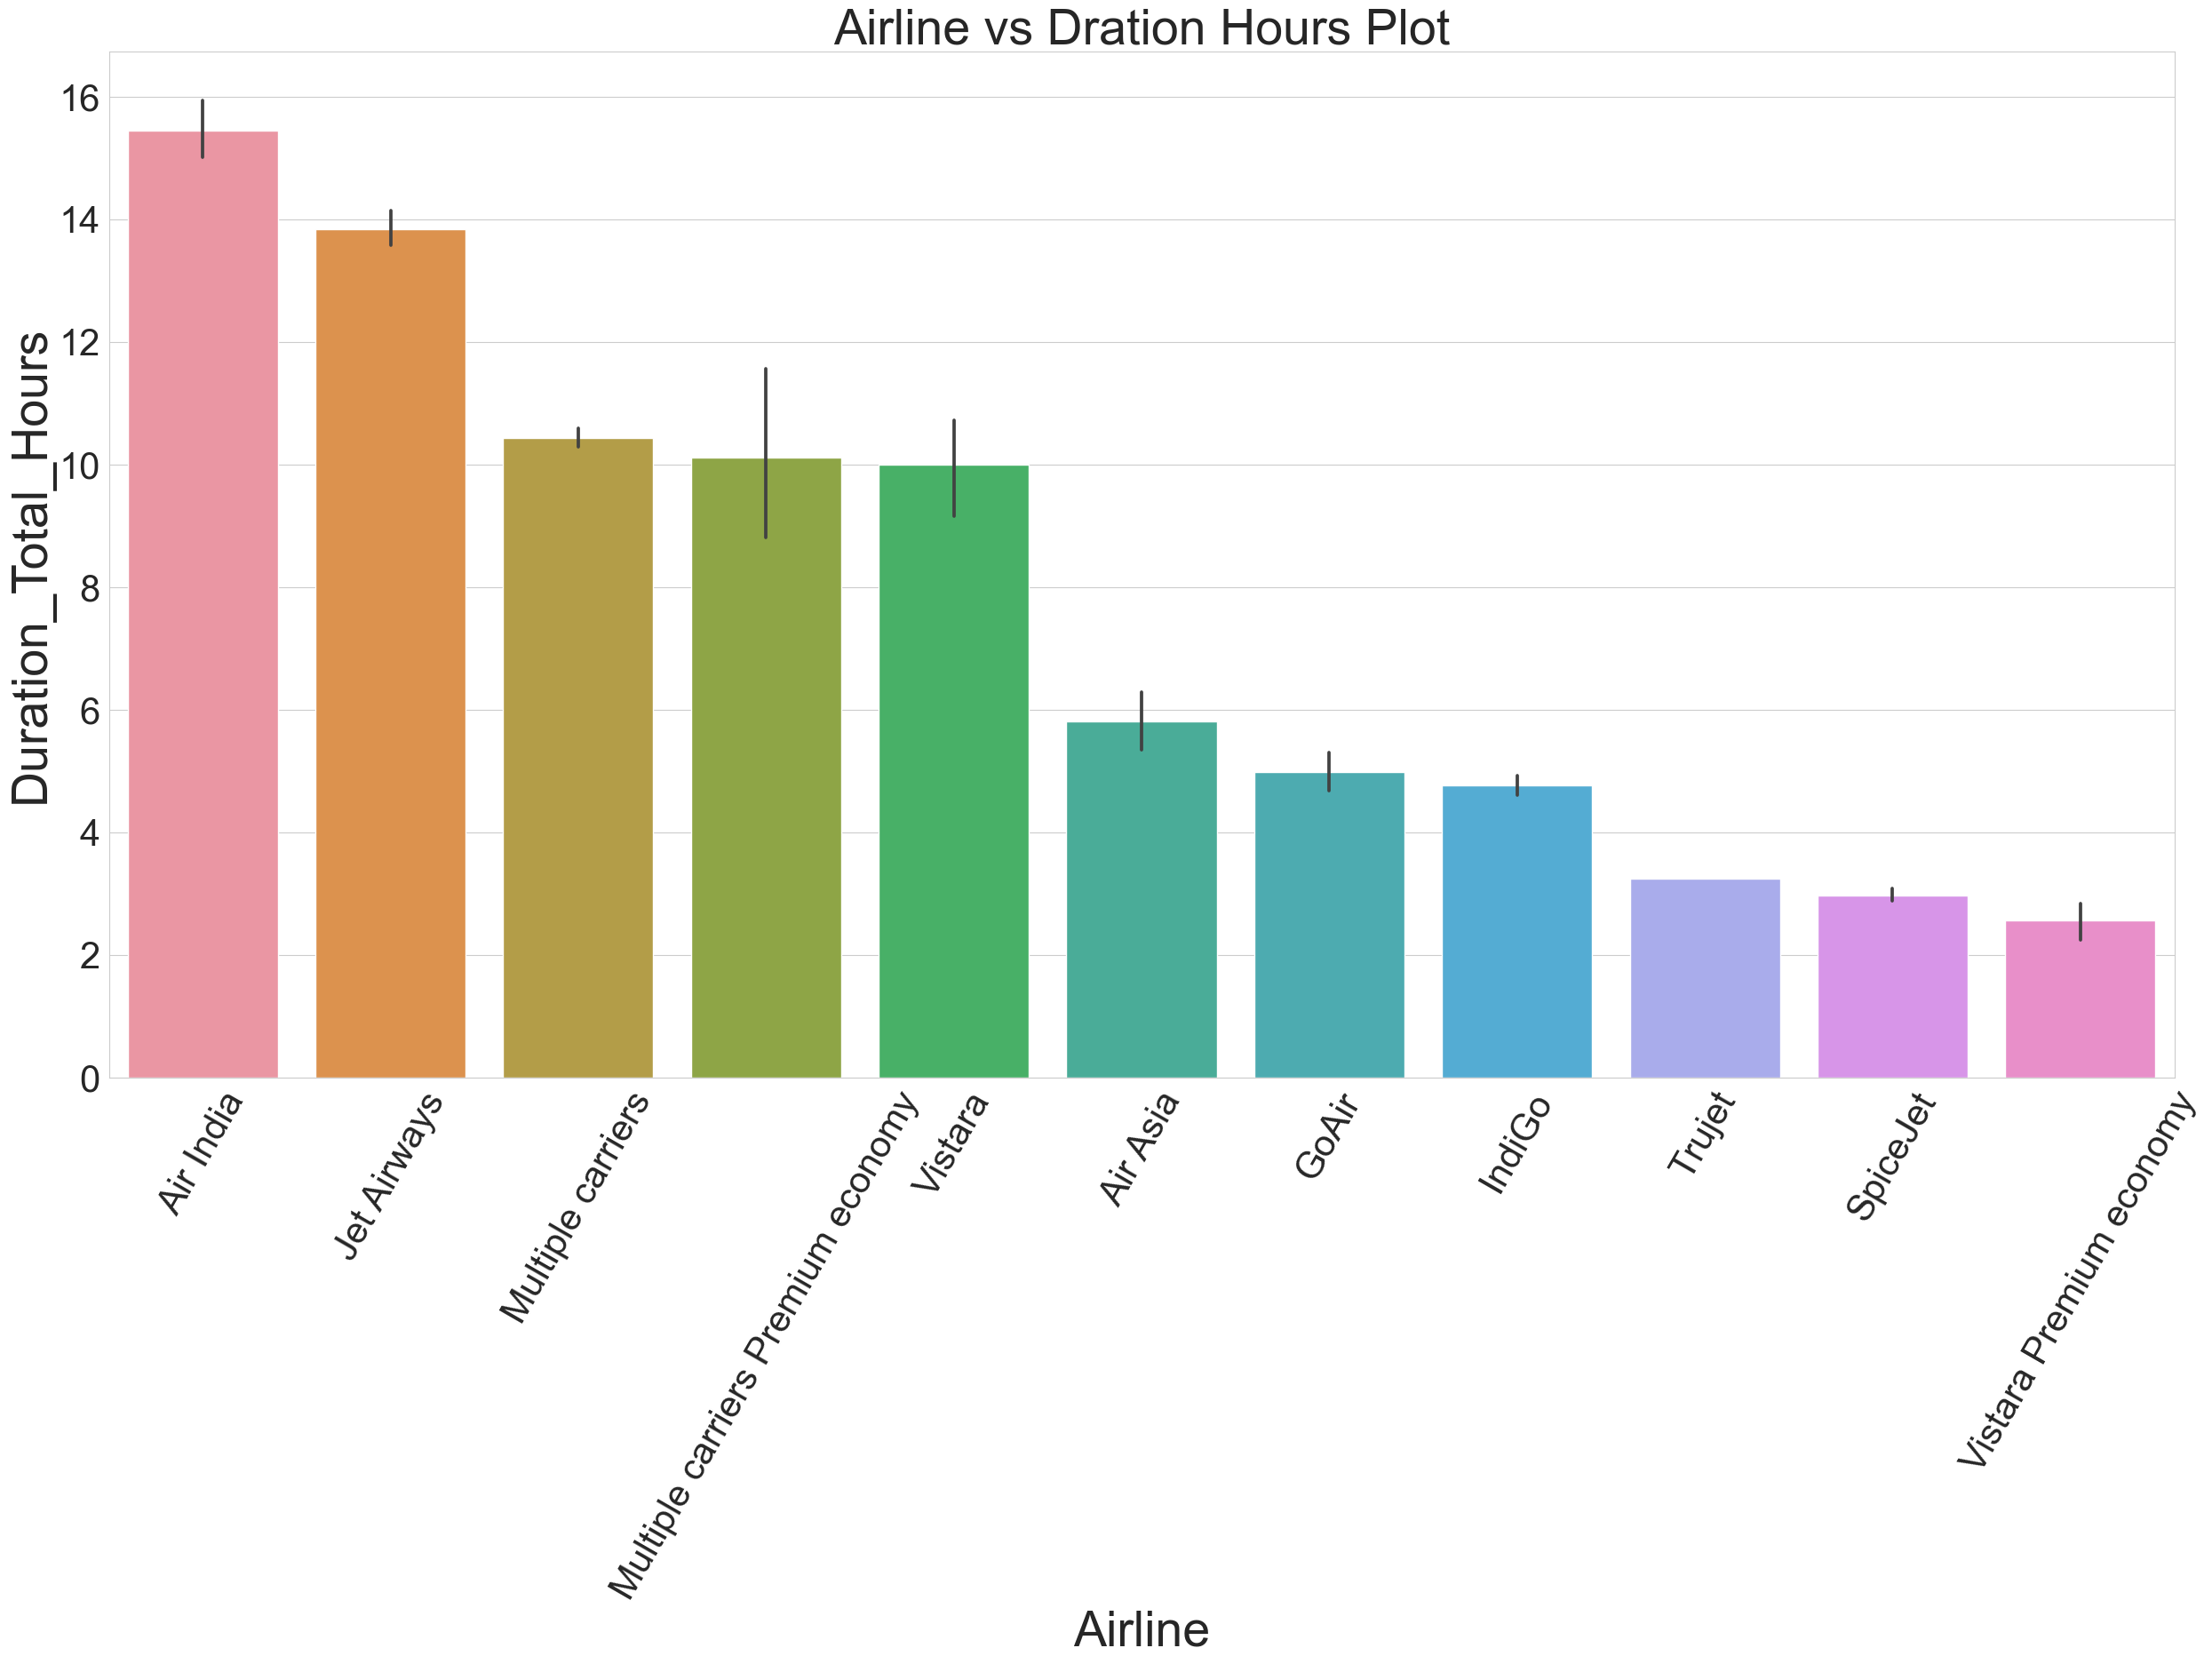

In [35]:
plt.figure(figsize = (30,15))
plt.xlabel('Airline', fontsize = 40)
plt.ylabel('Flight Duration Hours', fontsize = 40)
plt.title('Airline vs Dration Hours Plot', fontsize = 40)
plt.xticks(rotation = 60, fontsize = 30)
plt.yticks(fontsize = 30)
sns.barplot(x = data['Airline'], y = data['Duration_Total_Hours'], order = data.groupby('Airline')['Duration_Total_Hours'].mean().sort_values(ascending = False).index)

<Axes: xlabel='Duration_Total_Hours', ylabel='Price'>

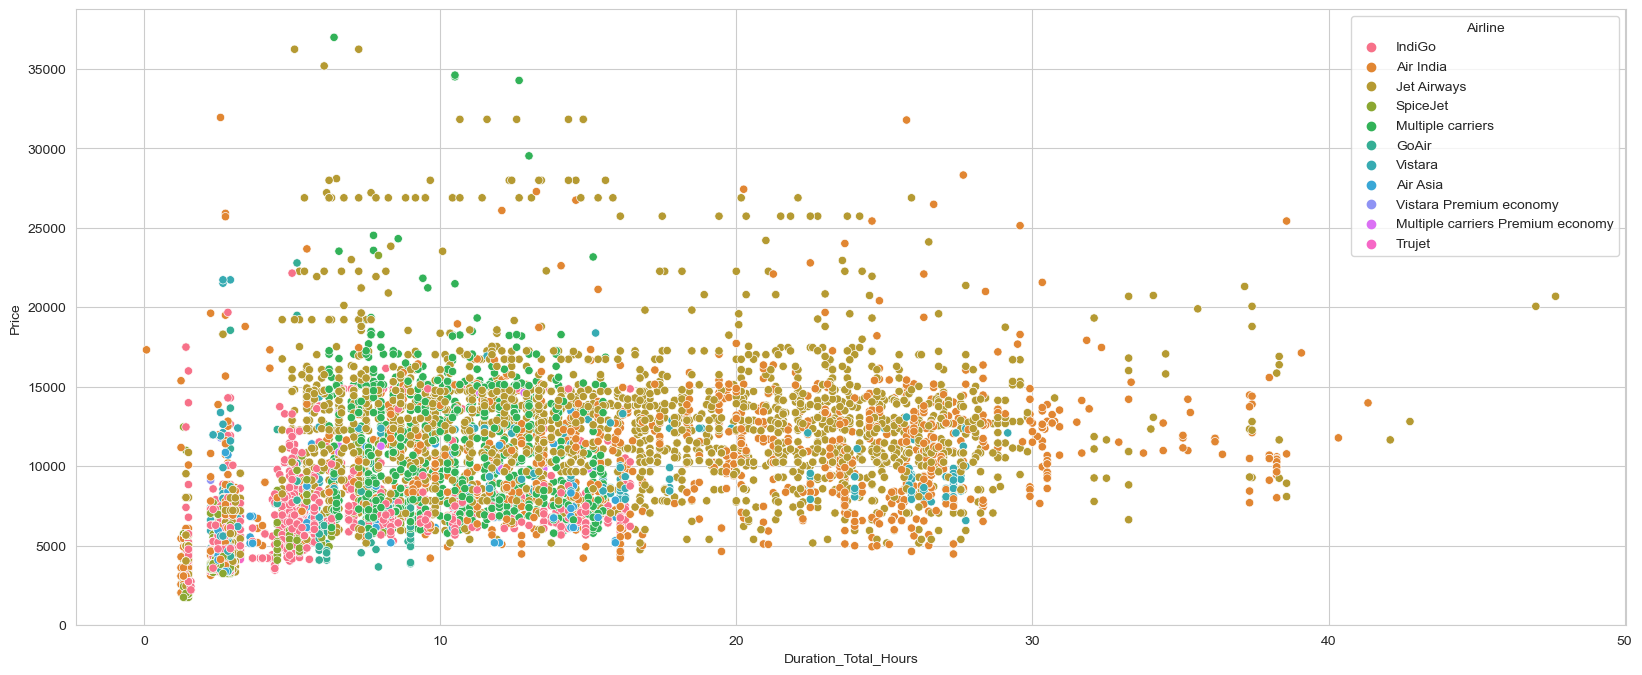

In [36]:
plt.figure(figsize = (20,8))
sns.scatterplot(x = data['Duration_Total_Hours'], y = data['Price'], hue = data['Airline'])

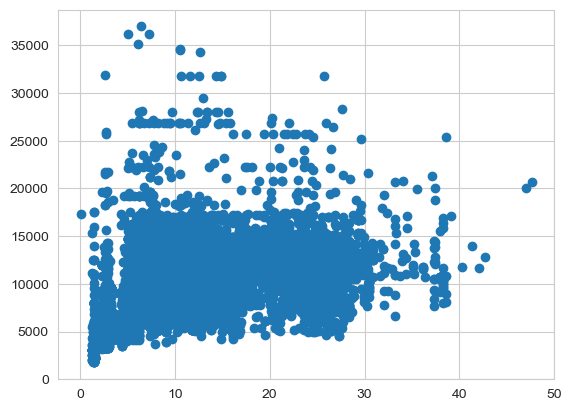

In [37]:
plt.scatter(data['Duration_Total_Hours'], data['Price'])

<Axes: title={'center': 'Departure Time vs Price Plot'}, xlabel='Dep_Time_Hour', ylabel='Price'>

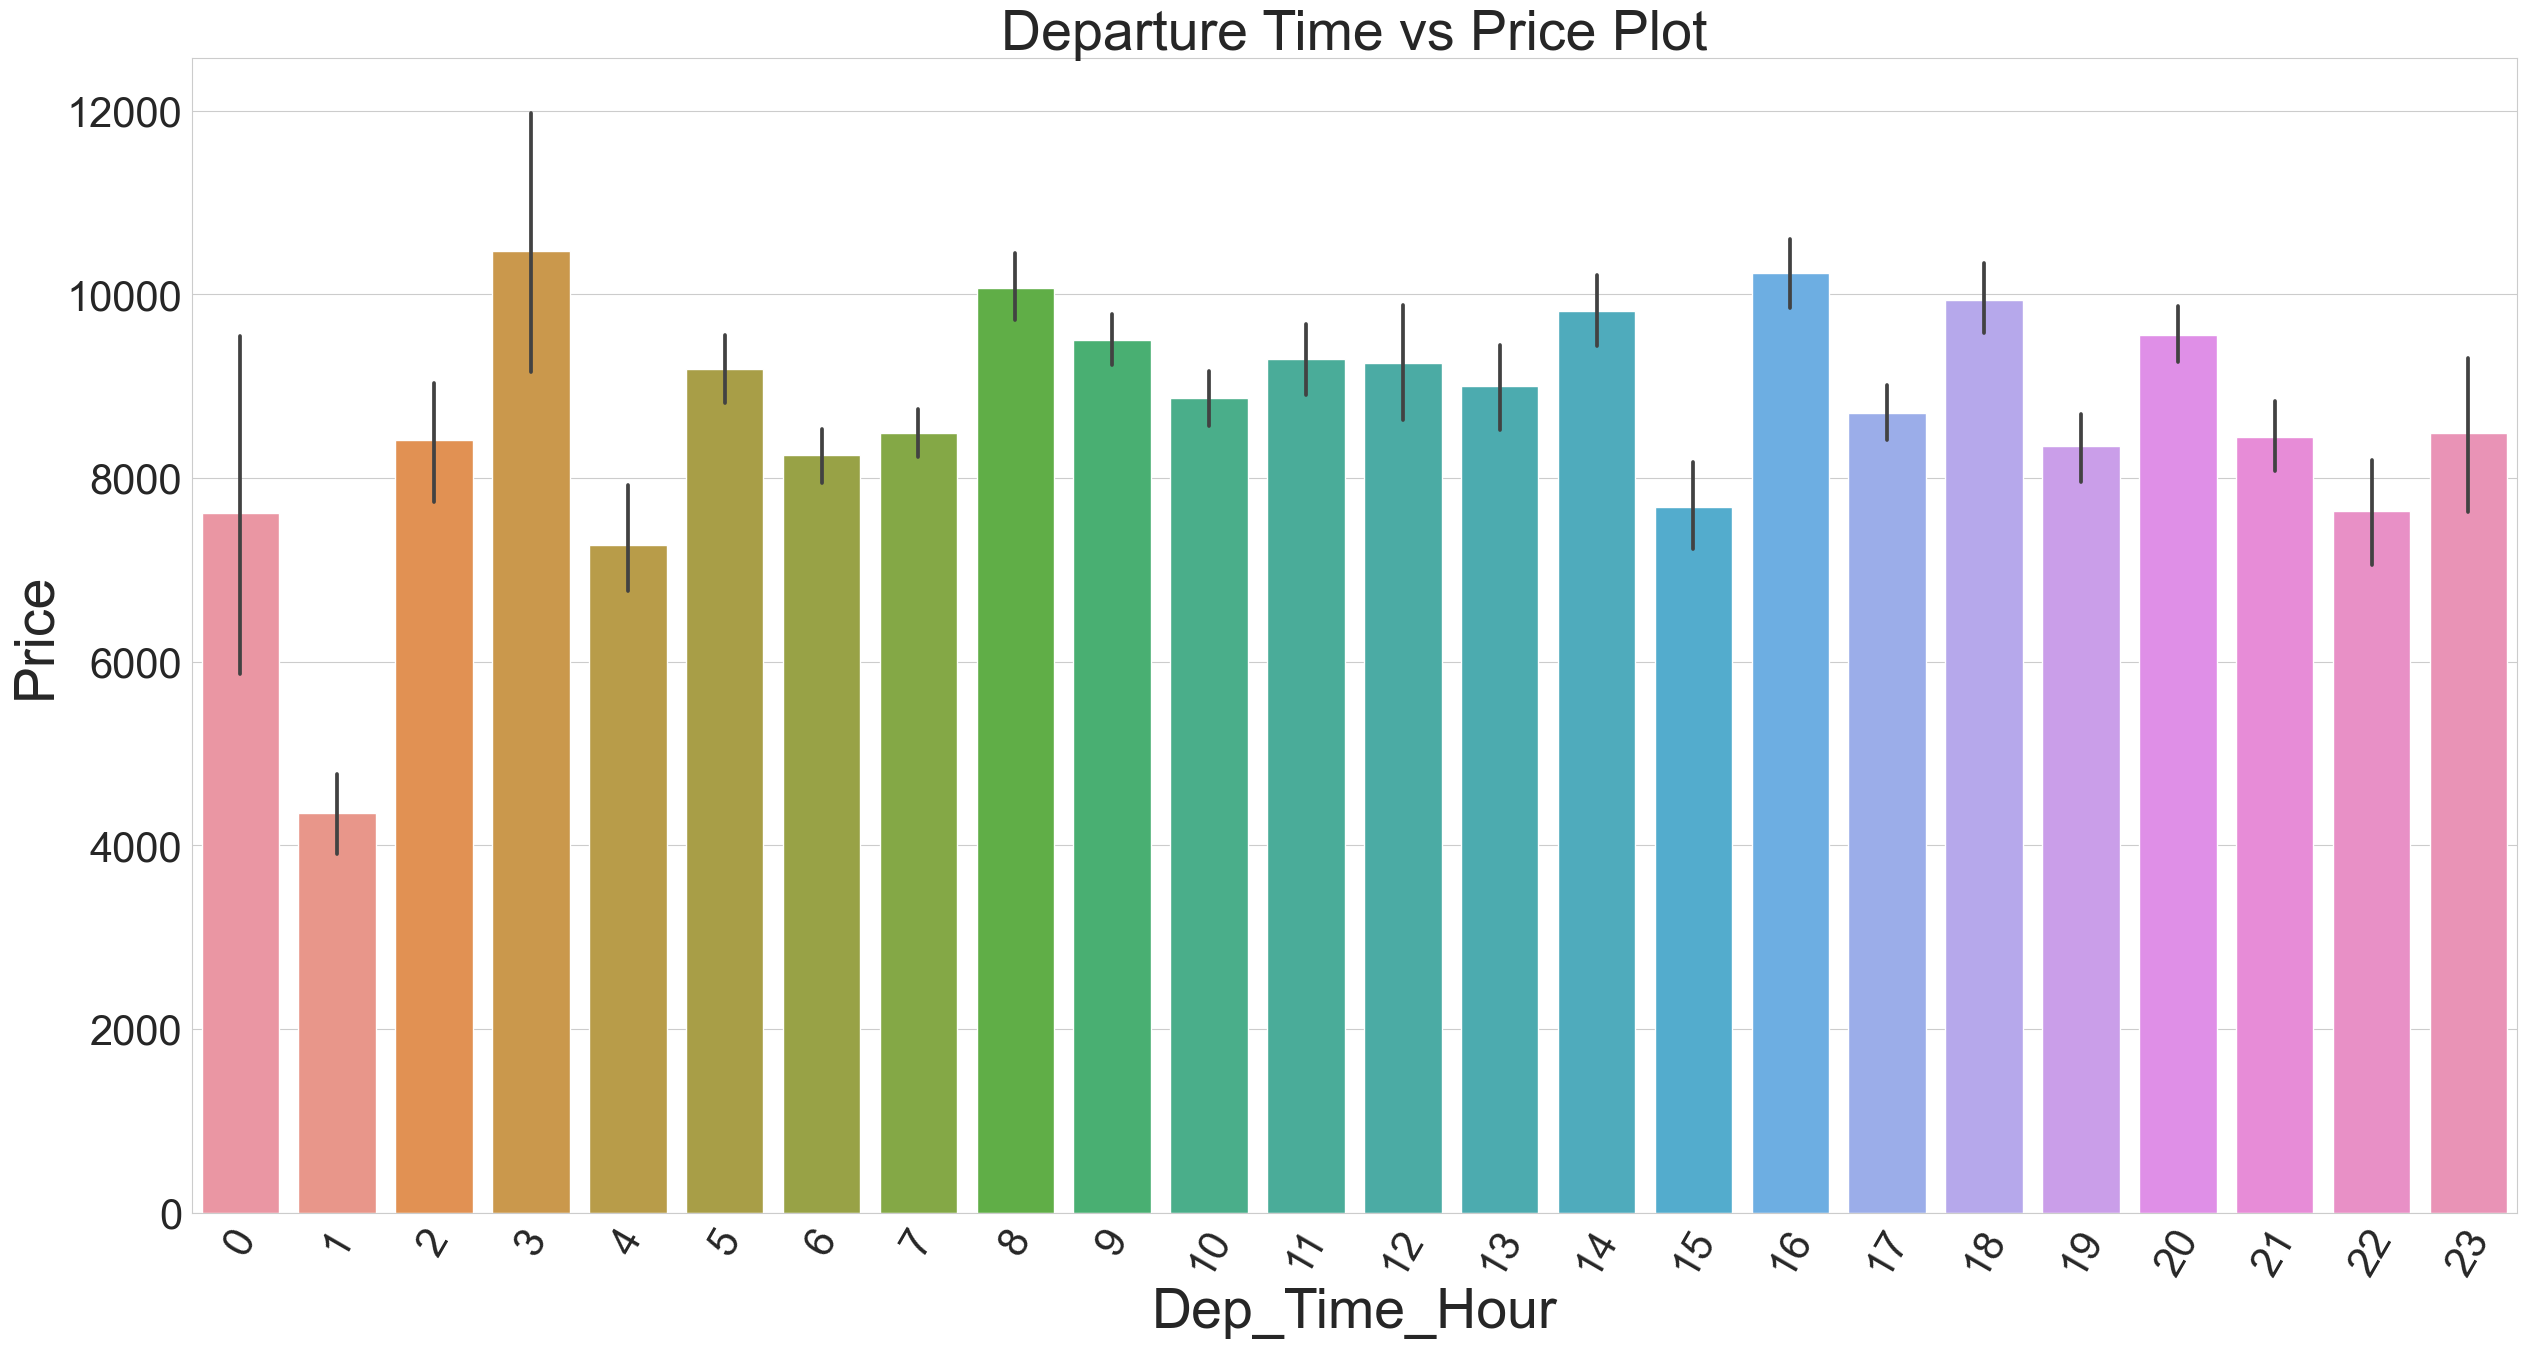

In [38]:
plt.figure(figsize = (30,15))
plt.xlabel('Dep_Time_Hour', fontsize = 40)
plt.ylabel('Price', fontsize = 40)
plt.title('Departure Time vs Price Plot', fontsize = 40)
plt.xticks(rotation = 60, fontsize = 30)
plt.yticks(fontsize = 30)
sns.barplot(x = data['Dep_Time_Hour'], y = data['Price']) #order = data.groupby('Dep_Time_Hour')['Price'].mean().sort_values(ascending = False).index)

<Axes: title={'center': 'Arrival Time vs Price Plot'}, xlabel='Arrival_Time_Hour', ylabel='Price'>

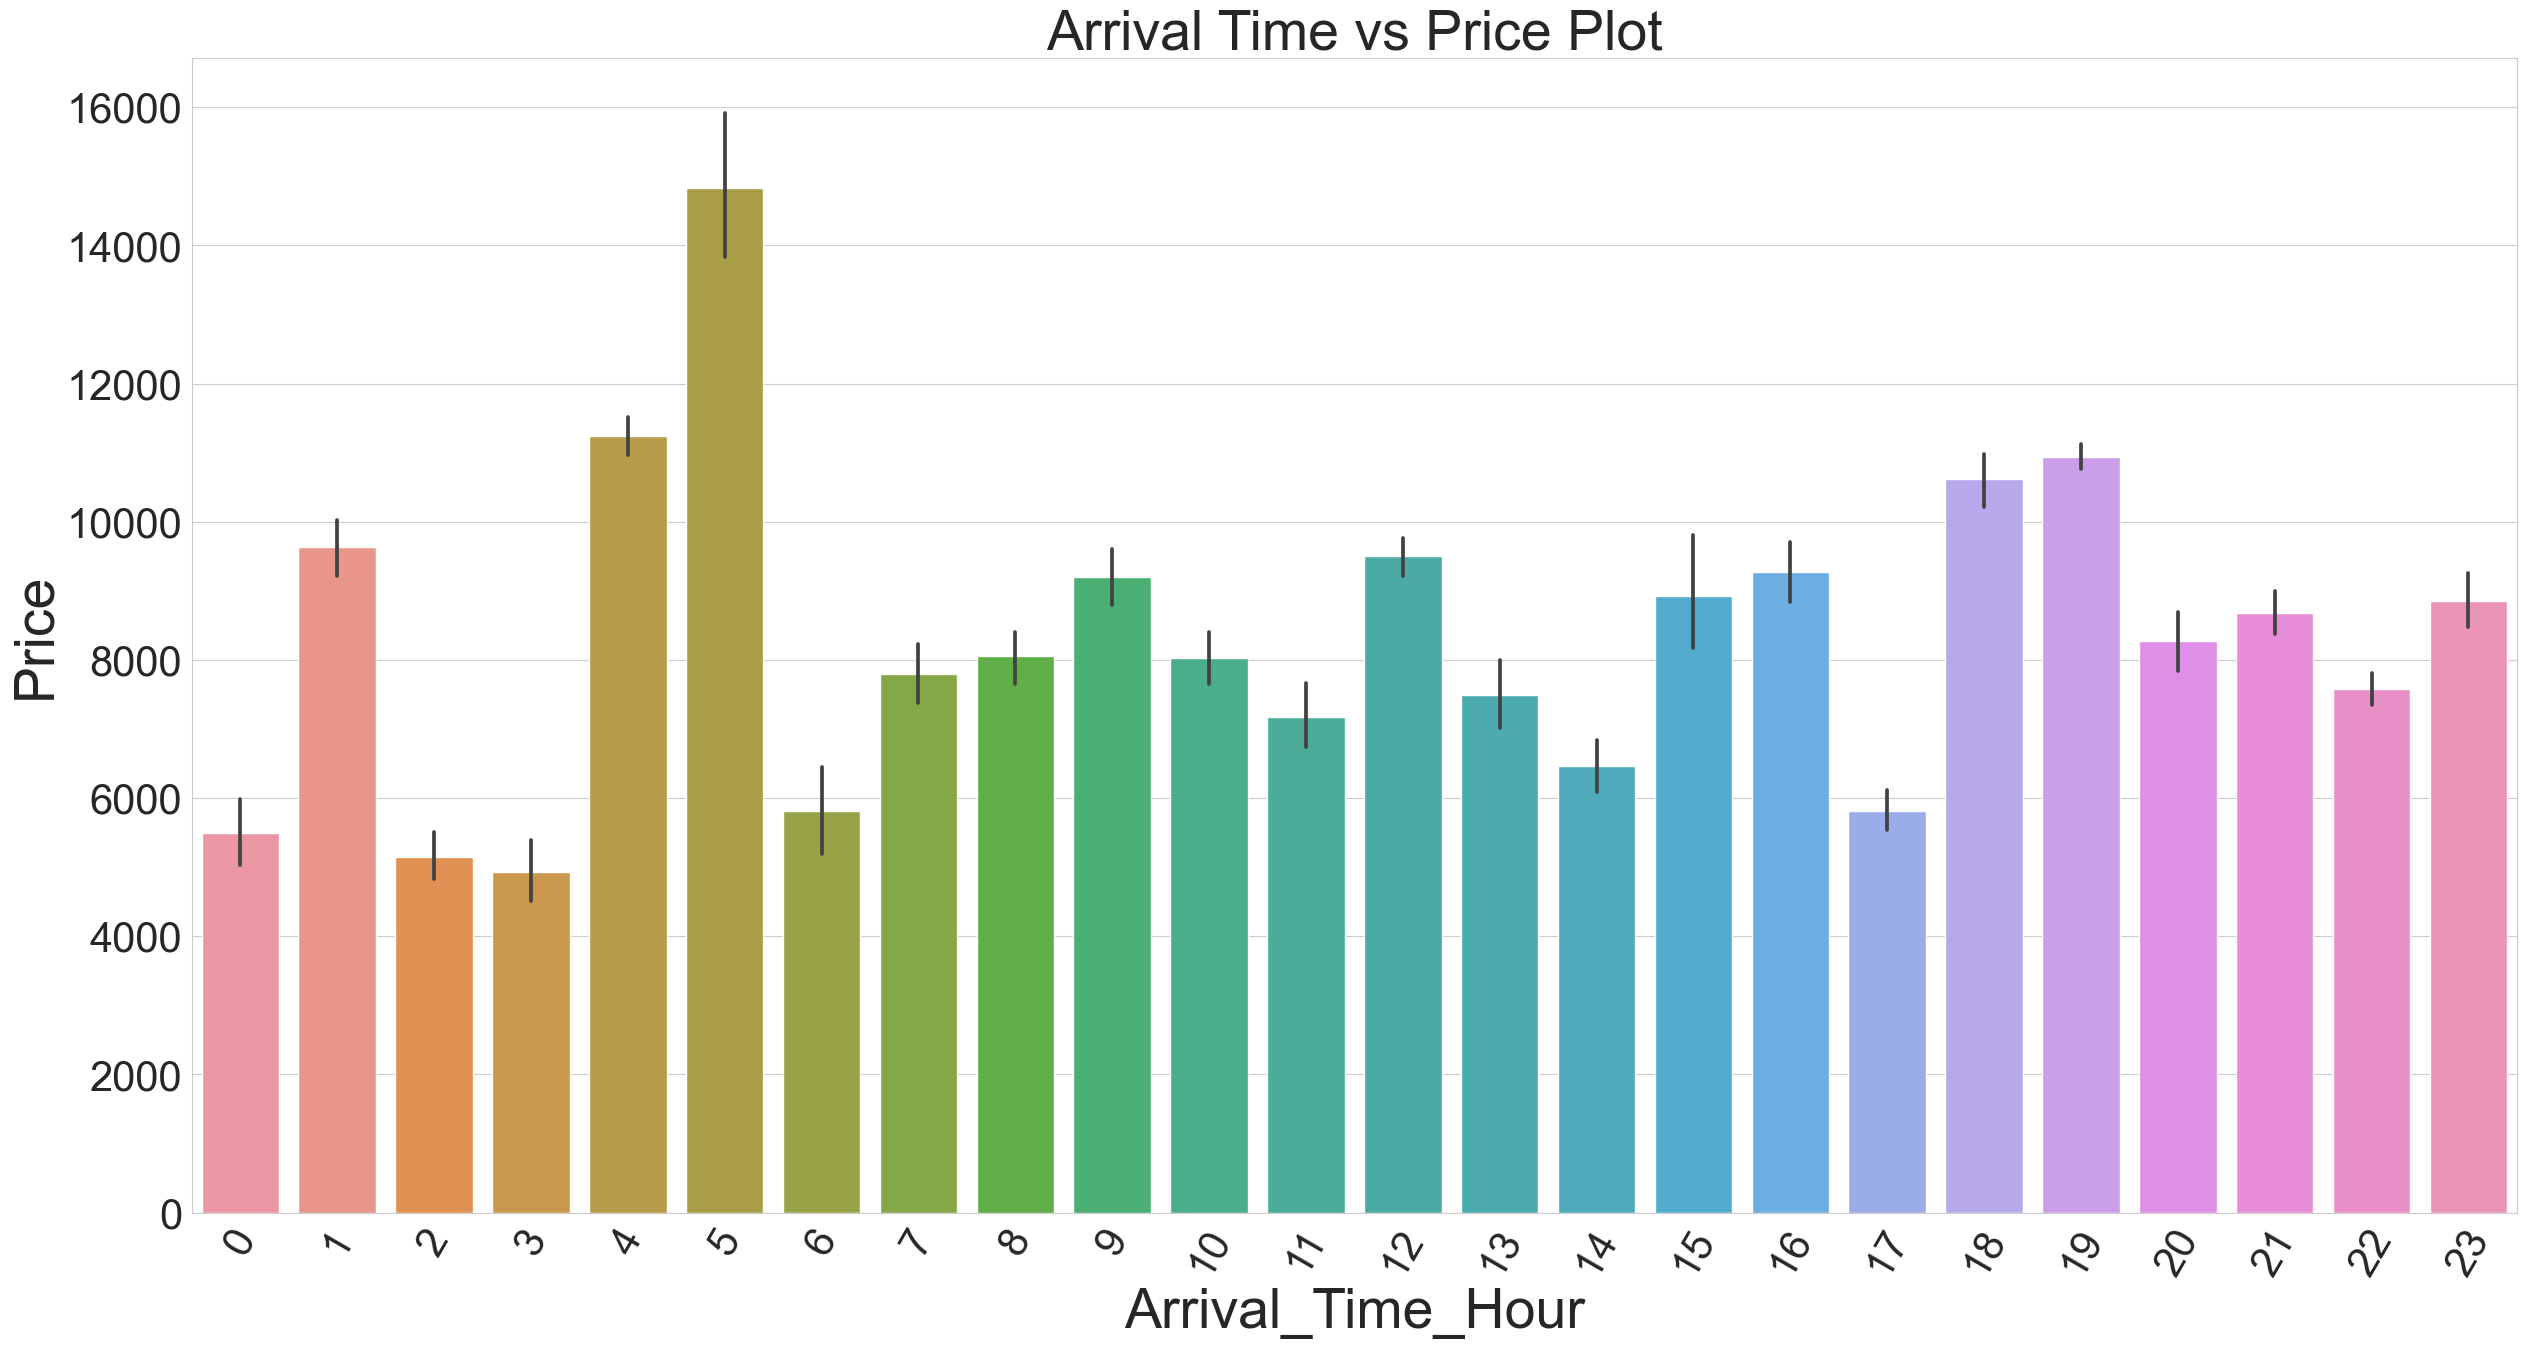

In [39]:
plt.figure(figsize = (30,15))
plt.xlabel('Arrival_Time_Hour', fontsize = 40)
plt.ylabel('Price', fontsize = 40)
plt.title('Arrival Time vs Price Plot', fontsize = 40)
plt.xticks(rotation = 60, fontsize = 30)
plt.yticks(fontsize = 30)
sns.barplot(x = data['Arrival_Time_Hour'], y = data['Price']) #order = data.groupby('Dep_Time_Hour')['Price'].mean().sort_values(ascending = False).index)

In [40]:
#sns.pairplot(data, kind = 'reg')

In [41]:
data.corr(numeric_only = True)

,Total_Stops,Price,day,month,year,weekday,Dep_Time_Hour,Dep_Time_Minute,Arrival_Time_Hour,Arrival_Time_Minute,Duration_Total_Hours
Total_Stops,1.000000,0.627769,-0.018937,0.039003,NaN,-0.031170,-0.067523,-0.002695,0.051476,-0.107099,0.727982
Price,0.627769,1.000000,-0.158057,-0.105301,NaN,0.057836,0.005248,-0.032627,0.038038,-0.090436,0.532729
day,-0.018937,-0.158057,1.000000,-0.038331,NaN,-0.085837,-0.003394,-0.004741,-0.002448,-0.015086,-0.029810
month,0.039003,-0.105301,-0.038331,1.000000,NaN,-0.081877,0.040406,-0.062636,0.001423,-0.099261,0.004874
year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
weekday,-0.031170,0.057836,-0.085837,-0.081877,NaN,1.000000,-0.013829,0.013733,-0.006822,0.029659,-0.007866
Dep_Time_Hour,-0.067523,0.005248,-0.003394,0.040406,NaN,-0.013829,1.000000,-0.015068,-0.003827,0.072989,-0.001285
Dep_Time_Minute,-0.002695,-0.032627,-0.004741,-0.062636,NaN,0.013733,-0.015068,1.000000,0.046564,-0.021353,-0.019225
Arrival_Time_Hour,0.051476,0.038038,-0.002448,0.001423,NaN,-0.006822,-0.003827,0.046564,1.000000,-0.152036,0.061912
Arrival_Time_Minute,-0.107099,-0.090436,-0.015086,-0.099261,NaN,0.029659,0.072989,-0.021353,-0.152036,1.000000,-0.070977


<Axes: ylabel='Airline'>

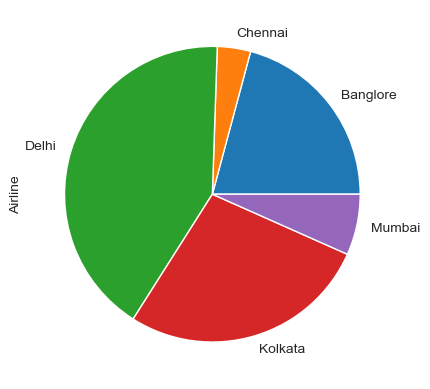

In [42]:
df1 = data.groupby('Source').count()
df1['Airline'].plot(kind = 'pie')

### Insights:
1. Jet Airways and Multiple Carrier Premium Economy have average price higher than other airlines.
2. Flights from Delhi have the highest average price.
3. Flights to Cochin have the highest average price.
4. The average price is directly proportional to the Number of stops.
5. There is an unusual peak in Price around flight arrival time at 5 AM.


## Multicollinearity

<Axes: >

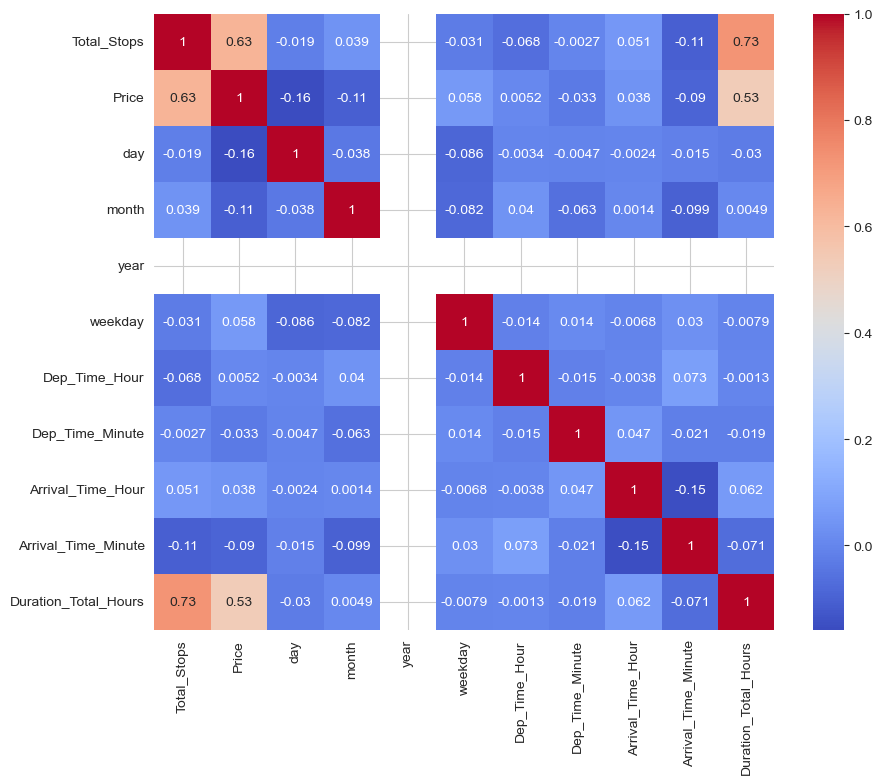

In [43]:
plt.figure(figsize = (10,8))
sns.heatmap(data.corr(numeric_only = True), annot = True, cmap = 'coolwarm')
#the year column has the same value for all data ie '2019'

- 'Duration_Total_Hours' and 'Total_Stops' are highly correlated so we can drop either one.

In [44]:
data_model

,Route,Total_Stops,Price,day,month,weekday,Dep_Time_Hour,Dep_Time_Minute,Arrival_Time_Hour,Arrival_Time_Minute,Duration_Total_Hours,Airline_Air Asia,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Banglore,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata
0,BLR → DEL,0,3897,24,3,6,22,20,1,10,2.833333,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
1,CCU → IXR → BBI → BLR,2,7662,1,5,2,5,50,13,15,7.416667,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
2,DEL → LKO → BOM → COK,2,13882,9,6,6,9,25,4,25,19.000000,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
3,CCU → NAG → BLR,1,6218,12,5,6,18,5,23,30,5.416667,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
4,BLR → NAG → DEL,1,13302,1,3,4,16,50,21,35,4.750000,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,CCU → BLR,0,4107,9,4,1,19,55,22,25,2.500000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
10679,CCU → BLR,0,4145,27,4,5,20,45,23,20,2.583333,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
10680,BLR → DEL,0,7229,27,4,5,8,20,11,20,3.000000,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
10681,BLR → DEL,0,12648,1,3,4,11,30,14,10,2.666667,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0


In [45]:
data_model.drop(['Route'], axis = 1, inplace = True)

# Train - Test Split

In [46]:
X = data_model.drop('Price', axis =1)
y= data_model['Price']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state = 42)

In [51]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
#r2_score is R^2 value which will tell us the goodness/quality of fitting of 
#the regression line with the dataset


### How R^2 in Linear regression works? So the model first calculates the mean value for the datset and a line passing through the mean value with help of RSS values from the data points. Next, the linear regression line is plotted with help of SSE calculated. R^2 is 1- SSE/SSR or (SSR-SSE)/SSR. It lies between 0 to 1. For values closer to 1, model fits the dataset very well; for values closer to 0 model is very bad or ill-suited. 

In [59]:
#There is a certainconvention of writing our model. 
#How do you write a universal model?
def predict(ml_model):
    print('Model name is: {}'.format(ml_model))
    model = ml_model.fit(X_train, y_train)
    print('Training score: {}'.format(model.score(X_train, y_train)))
    #score function is based on R^2 
    predictions = model.predict(X_test)
    
    r2score = r2_score(y_test, predictions)
    print('r2_score is: {}'.format(r2score))
    adj_r2 = 1-(1-r2score)* ((len(X_test) - 1)/(len(X_test) - X_test.shape[1] - 1))
    print('Adjusted R2 score: {}'.format(adj_r2))
    #adjusted R2 is used because it analyses every feature to calculate R2 score
    #R2 score increases with increase in features irrespective of whether the 
    #feature is significant or not. so adjusted R2 score is used to ignore the 
    #affect of every non-significant feature and not increase a lot. This is 
    #the definition and purpose and difference of adjusted R^2.
    
    print('Mean Absolute Error(MAE): {}'.format(mean_absolute_error(y_test, predictions)))
    print('Mean Squared Error(MSE): {}'.format(mean_squared_error(y_test, predictions)))
    print('Root Mean Squared Error(RMSE): {}'.format(np.sqrt(mean_squared_error(y_test, predictions))))

In [60]:
predict(LinearRegression())

Model name is: LinearRegression()
Training score: 0.5619251041266808
r2_score is: 0.5718483193400243
Adjusted R2 score: 0.5656191484283855
Mean Absolute Error(MAE): 2028.8350482686128
Mean Squared Error(MSE): 8927080.87342627
Root Mean Squared Error(RMSE): 2987.822095344077


In [61]:
predict(DecisionTreeRegressor())
# Insight: Training score is very high but R2 score is very low, this is case 
#of overfitting

Model name is: DecisionTreeRegressor()
Training score: 0.9697961300999993
r2_score is: 0.6996510067506752
Adjusted R2 score: 0.6952812347829351
Mean Absolute Error(MAE): 1400.7244386048733
Mean Squared Error(MSE): 6262359.519074826
Root Mean Squared Error(RMSE): 2502.4706829601073


In [63]:
predict(RandomForestRegressor())
#comparatively this model is better than the previous ones

Model name is: RandomForestRegressor()
Training score: 0.9527157073958807
r2_score is: 0.8062289215851566
Adjusted R2 score: 0.80340974973625
Mean Absolute Error(MAE): 1188.627680590631
Mean Squared Error(MSE): 4040180.5389947565
Root Mean Squared Error(RMSE): 2010.0200344759642


In [64]:
predict(XGBRegressor())
#slightly better than RandomForest as well

Model name is: XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)
Training score: 0.9368479770941859
r2_score is: 0.8179029304325958
Adjusted R2 score: 0.8152536035232737
Mean Absolute Error(MAE): 1156.6366858557542
Mean Squared Error(MSE): 3796774.2280875063
Root Mean Squared Error(RMSE): 1948.53130025

In [ ]:
# look into RandomizedSearchCv 

## Feature importance
### Feature selection refers to selecting attributes from our existing data to perform some sort of analysis.
### Feature Extraction refers to extracting already existing features and creating new features in our dataset.
### PCA is a form of Feature Extraction since we are rotating the axis in that so the original features do not exist, features are clubbed together to create new features.

In [66]:
from sklearn.ensemble import ExtraTreesRegressor
#same as RandomForest just more randomized. RandomForest takes every value in 
#the dataset but this does not do this, it always samples the rows along with 
#features
extractor = ExtraTreesRegressor()
extractor.fit(X_train, y_train)

ExtraTreesRegressor()

In [67]:
x_columns = X_train.columns
features_rank = pd.DataFrame({'Features': x_columns, 'importance': extractor.feature_importances_})
features_rank = features_rank.sort_values('importance', ascending = False)

In [68]:
features_rank

,Features,importance
0,Total_Stops,0.300238
13,Airline_Jet Airways,0.135197
1,day,0.130730
8,Duration_Total_Hours,0.093472
2,month,0.055648
5,Dep_Time_Minute,0.033923
4,Dep_Time_Hour,0.033682
3,weekday,0.033501
6,Arrival_Time_Hour,0.033447
7,Arrival_Time_Minute,0.025829


<Axes: xlabel='importance', ylabel='Features'>

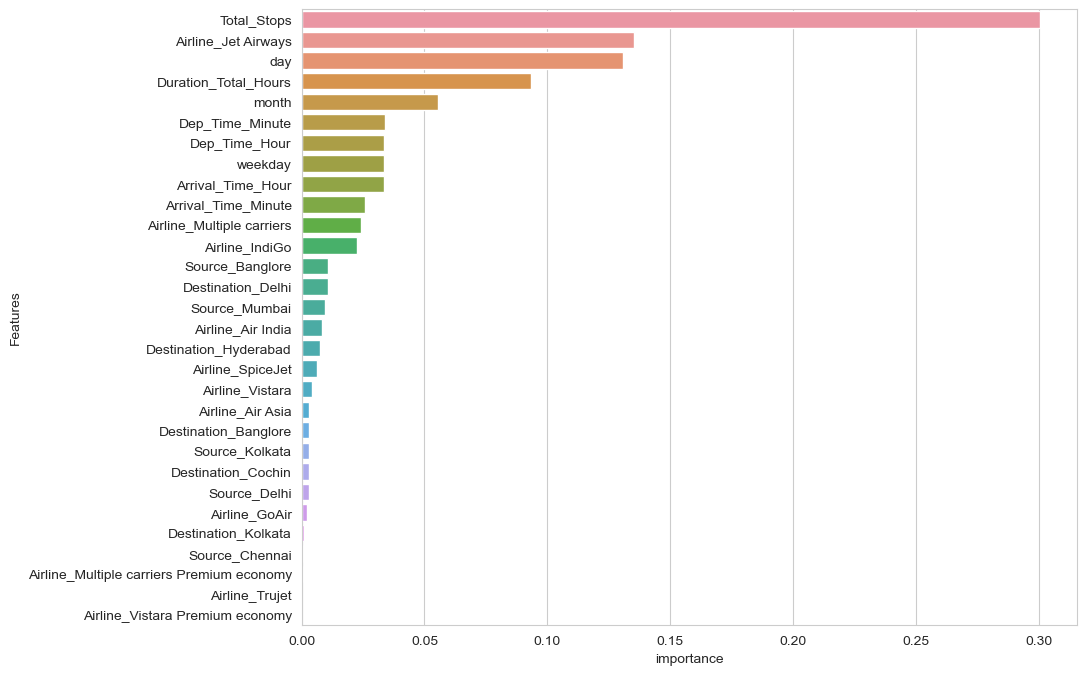

In [69]:
plt.figure(figsize = (10,8))
sns.barplot(y = 'Features', x = 'importance', data = features_rank)

In [71]:
features_rank['cumsum'] = features_rank['importance'].cumsum()*100
features_rank.head(10)

,Features,importance,cumsum
0,Total_Stops,0.300238,30.023847
13,Airline_Jet Airways,0.135197,43.543538
1,day,0.130730,56.616571
8,Duration_Total_Hours,0.093472,65.963741
2,month,0.055648,71.528584
5,Dep_Time_Minute,0.033923,74.920839
4,Dep_Time_Hour,0.033682,78.289060
3,weekday,0.033501,81.639119
6,Arrival_Time_Hour,0.033447,84.983815
7,Arrival_Time_Minute,0.025829,87.566764


In [72]:
features_rank.head(15)
#using only these 15 features i can get 95% of imformation derived from the entire dataset

,Features,importance,cumsum
0,Total_Stops,0.300238,30.023847
13,Airline_Jet Airways,0.135197,43.543538
1,day,0.130730,56.616571
8,Duration_Total_Hours,0.093472,65.963741
2,month,0.055648,71.528584
5,Dep_Time_Minute,0.033923,74.920839
4,Dep_Time_Hour,0.033682,78.289060
3,weekday,0.033501,81.639119
6,Arrival_Time_Hour,0.033447,84.983815
7,Arrival_Time_Minute,0.025829,87.566764
